In [321]:
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
from sklearn import metrics, preprocessing
from sklearn.model_selection  import train_test_split 
import statsmodels.formula.api as sm
from operator import itemgetter
import pysal as ps
#import rasterio
import itertools
from math import sqrt

In [2]:
data_co2 = pd.read_csv('Data/Footprint/bristol_CO2_data', encoding='latin-1').set_index('LSOA')
data_lsoa = gpd.read_file('Data/Spatial/LSOA_EW.shp').set_index('geo_code')
data_cen = pd.read_csv('Data/Census/all_data.csv').set_index('GEO_CODE')
data_imd = pd.read_csv('Data/Census/imd_all_score.csv').set_index('Reference area').join(gpd.read_file('Data/Spatial/LSOA_EW.shp').set_index('geo_label'), how = 'inner').set_index('geo_code').drop('http://opendatacommunities.org/def/ontology/geography/refArea', axis = 1).iloc[:,:9]

# IMD

In [3]:
data_imd.columns.to_list()

['a. Index of Multiple Deprivation (IMD)',
 'b. Income Deprivation Domain',
 'c. Employment Deprivation Domain',
 'd. Education, Skills and Training Domain',
 'e. Health Deprivation and Disability Domain',
 'f. Crime Domain',
 'g. Barriers to Housing and Services Domain',
 'h. Living Environment Deprivation Domain',
 'i. Income Deprivation Affecting Children Index (IDACI)']

In [4]:
data_imd.columns = data_imd.columns.str[0]
col_list = data_imd.columns.to_list()

In [5]:
ln_col_list = []
for item in col_list:
    data_imd[item +'_ln'] = np.log(data_imd[item] + 0.00001)
    ln_col_list.append('ln_'+ item)

C:\Users\gylk\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000016DF89913C8>,
      dtype=object)

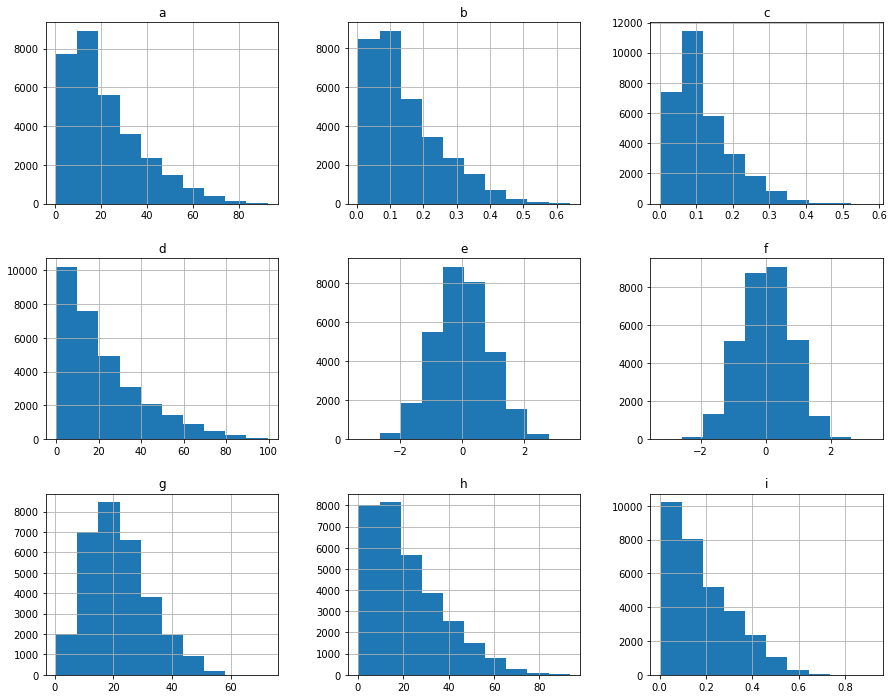

In [6]:
data_imd[col_list].hist(figsize=(15,12))

In [7]:
col_list_2 = ['a_ln', 'b_ln', 'c_ln', 'd_ln', 'e', 'f', 'g', 'h_ln', 'i_ln']

In [8]:

imd = data_lsoa.join(data_imd).join(data_cen, how = 'inner')

#classi = ps.Quantiles(imd['a'], k=7)
#classi


#classi = ps.Fisher_Jenks(imd['a'], k=7)
#classi


In [9]:
'''
# can downlaod this via digimap
btl_path = 'Data/Spatial/st_clipped.tif'

imd = data_lsoa.join(data_imd).join(data_cen, how = 'inner')

mygreys_list = ['#dbd7d6', '#dedbda', '#e2dfde', '#e5e3e2', '#e9e7e6', '#edebea', '#f0efee', '#f4f3f2', '#f7f7f6', '#fbfbfa', '#ffffff']
mygreys = matplotlib.colors.ListedColormap(mygreys_list, N=None)


# Open the raster file
src = rasterio.open(btl_path)
# Extract the bounds
left, bottom, right, top = (350000, src.bounds[1], 365500, src.bounds[3]-2500)


# NOTE: this may take a little bit to run depending on your machine

# Set up the figure
f, ax = plt.subplots(1, figsize=(9, 9))
# Add raster layer
ax.imshow(src.read(1), cmap=mygreys, extent=(left, right, bottom, top))
# Create the choropleth
imd.plot(column='a', cmap='Oranges', 
         linewidth=0.1, alpha=1, ax=ax)
# Style the labels for the ticks
locs, labels = plt.xticks()
plt.setp(labels, rotation=90)
# Keep axes proportionate
#plt.axis('equal')
# Display
plt.show()
'''

"\n# can downlaod this via digimap\nbtl_path = 'Data/Spatial/st_clipped.tif'\n\nimd = data_lsoa.join(data_imd).join(data_cen, how = 'inner')\n\nmygreys_list = ['#dbd7d6', '#dedbda', '#e2dfde', '#e5e3e2', '#e9e7e6', '#edebea', '#f0efee', '#f4f3f2', '#f7f7f6', '#fbfbfa', '#ffffff']\nmygreys = matplotlib.colors.ListedColormap(mygreys_list, N=None)\n\n\n# Open the raster file\nsrc = rasterio.open(btl_path)\n# Extract the bounds\nleft, bottom, right, top = (350000, src.bounds[1], 365500, src.bounds[3]-2500)\n\n\n# NOTE: this may take a little bit to run depending on your machine\n\n# Set up the figure\nf, ax = plt.subplots(1, figsize=(9, 9))\n# Add raster layer\nax.imshow(src.read(1), cmap=mygreys, extent=(left, right, bottom, top))\n# Create the choropleth\nimd.plot(column='a', cmap='Oranges', \n         linewidth=0.1, alpha=1, ax=ax)\n# Style the labels for the ticks\nlocs, labels = plt.xticks()\nplt.setp(labels, rotation=90)\n# Keep axes proportionate\n#plt.axis('equal')\n# Display\nplt.

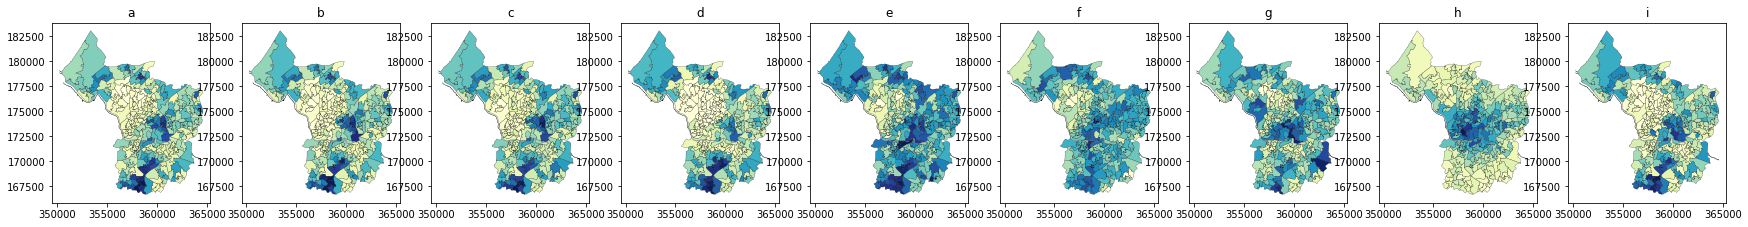

In [10]:
fig, (axs) = plt.subplots(ncols=len(col_list), nrows=1, figsize=(30, 20))

for i in range(len(col_list)):
    data_lsoa.join(data_imd)\
         .join(data_cen, how = 'inner')\
         .plot(ax=axs[i],
               column=col_list[i], 
               cmap='YlGnBu',
               linewidth=0.2, edgecolor='black', 
               legend=False)\
         .set_title(col_list[i])

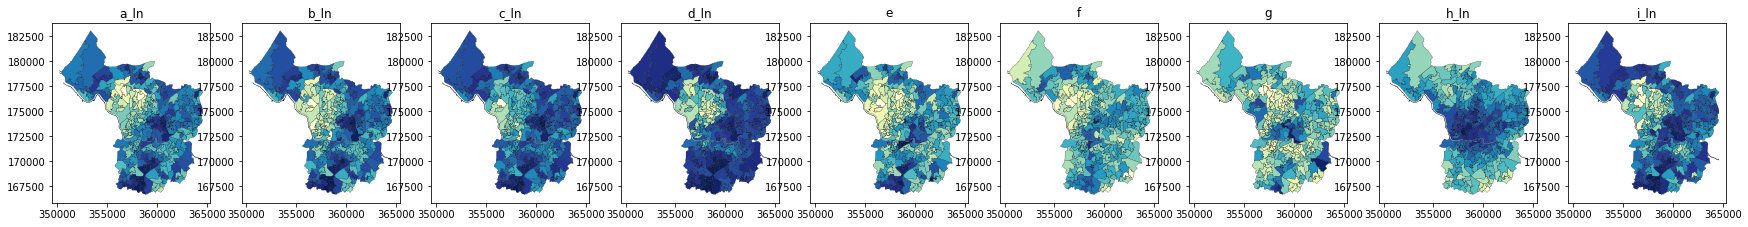

In [11]:
fig, (axs) = plt.subplots(ncols=len(col_list_2), nrows=1, figsize=(30, 20))

for i in range(len(col_list_2)):
    data_lsoa.join(data_imd)\
         .join(data_cen, how = 'inner')\
         .plot(ax=axs[i],
               column=col_list_2[i], 
               cmap='YlGnBu',
               linewidth=0.2, edgecolor='black', 
               legend=False)\
         .set_title(col_list_2[i])

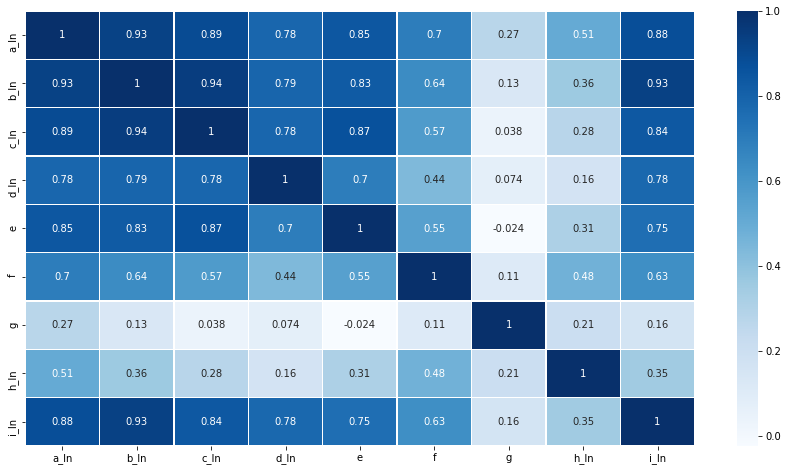

In [12]:
plt.subplots(figsize=(15,8))
sns.heatmap(data_imd[col_list_2].corr(), annot=True, cmap='Blues', linewidths=.5)
plt.show()

# CO2

## by person

In [13]:
data_co2.head()

Bread_rice_and_cereals  Pasta_products  Buns_cakes_biscuits  \
LSOA                                                                     
E01014485                   0.062           0.005                0.043   
E01014486                   0.060           0.005                0.042   
E01014487                   0.065           0.005                0.044   
E01014488                   0.064           0.005                0.044   
E01014489                   0.062           0.005                0.042   

           Pastry   Beef   Pork   Lamb  Poultry  Bacon_and_ham  Other_meats  \
LSOA                                                                          
E01014485   0.011  0.040  0.014  0.014    0.049          0.021        0.133   
E01014486   0.010  0.039  0.014  0.014    0.047          0.020        0.128   
E01014487   0.011  0.043  0.015  0.014    0.053          0.021        0.136   
E01014488   0.011  0.042  0.015  0.014    0.052          0.021        0.137   
E01014489   0.011  0.039  0.014  0.013    0.048          0.020        0.131   

           ...  Non_package_holiday  Moving_house  Bank_charges  \
LSOA       ...                                                    
E01014485  ...                0.002         0.024         0.006   
E01014486  ...                0.002         0.021         0.005   
E01014487  ...                0.002         0.025         0.007   
E01014488  ...                0.003         0.024         0.006   
E01014489  ...                0.002         0.022         0.006   

           Other_services_and_professional_fees  TOTAL         MSOA  \
LSOA                                                                  
E01014485                                 0.021  8.178   E02003034    
E01014486                                 0.014  7.806   E02003034    
E01014487                                 0.019  8.783   E02003031    
E01014488                                 0.016  8.519   E02003034    
E01014489                                 0.017  8.044   E02003034    

                   LAD              LAD_nm           REG      Pop  
LSOA                                                               
E01014485   E06000023    Bristol, City of    South West    1,895   
E01014486   E06000023    Bristol, City of    South West    2,465   
E01014487   E06000023    Bristol, City of    South West    2,121   
E01014488   E06000023    Bristol, City of    South West    1,972   
E01014489   E06000023    Bristol, City of    South West    2,553   

[5 rows x 142 columns]

In [14]:
data_co2_pop = data_co2.drop(['MSOA', 'LAD', 'LAD_nm', 'REG'], axis=1)

col_co2 = data_co2_pop.columns[:-1].to_list()

data_co2_pop['Pop'] = data_co2_pop['Pop'].str.replace(',', '')
for item in col_co2:
    data_co2_pop[item] = data_co2_pop[item].astype(float) * data_co2_pop['Pop'].astype(float)

In [15]:
pop_sum = 0
for i in range(len(data_co2_pop['Pop'])):
    pop_sum += int(data_co2_pop['Pop'][i])

In [16]:
data_co2_pop.T.head()

LSOA                   E01014485 E01014486 E01014487 E01014488 E01014489  \
Bread_rice_and_cereals    117.49     147.9   137.865   126.208   158.286   
Pasta_products             9.475    12.325    10.605      9.86    12.765   
Buns_cakes_biscuits       81.485    103.53    93.324    86.768   107.226   
Pastry                    20.845     24.65    23.331    21.692    28.083   
Beef                        75.8    96.135    91.203    82.824    99.567   

LSOA                   E01014491 E01014492 E01014493 E01014494 E01014495  ...  \
Bread_rice_and_cereals   141.108    95.285    89.182    95.067    107.04  ...   
Pasta_products             10.69      6.46      7.31     7.545      8.92  ...   
Buns_cakes_biscuits        96.21     67.83    62.866    66.396    76.712  ...   
Pastry                    25.656     16.15     14.62    16.599     17.84  ...   
Beef                      94.072    62.985     58.48    63.378     71.36  ...   

LSOA                   E01033356 E01033358 E01033359 E01033361 E01033362  \
Bread_rice_and_cereals    77.976    80.256     94.14   106.372     69.54   
Pasta_products             5.472      7.04     7.845     7.336     5.795   
Buns_cakes_biscuits        54.72    54.912    64.329    75.194    48.678   
Pastry                     13.68     14.08     15.69     18.34    12.749   
Beef                      50.616    52.096    59.622    69.692    45.201   

LSOA                   E01033364 E01033366 E01033367 E01033369 E01033370  
Bread_rice_and_cereals     81.74    69.768    71.803    72.276   179.816  
Pasta_products               6.7      6.12     6.085      6.34    12.844  
Buns_cakes_biscuits        57.62    47.736    49.897     50.72   125.229  
Pastry                     14.74     12.24     12.17     12.68    28.899  
Beef                        53.6    44.064    46.246    46.916   115.596  

[5 rows x 263 columns]

In [17]:
bristol_sum = data_co2_pop.drop('Pop', axis =1).T

bristol_sum['bristol_tot'] = bristol_sum.sum(axis=1, skipna=True)
bristol_sum = bristol_sum[['bristol_tot']].sort_values('bristol_tot', ascending=False)
bristol_sum['bristol_mean']=bristol_sum['bristol_tot'] / pop_sum

In [18]:
bristol_sum.iloc[:15, :]

LSOA                                     bristol_tot  bristol_mean
TOTAL                                    3761579.025      8.208180
Gas                                       699090.598      1.525493
Petrol_diesel                             537438.178      1.172749
Electricity                               520446.500      1.135672
Package_holidays_abroad                   218873.229      0.477606
Other_travel_and_transport                130953.725      0.285755
Furniture_and_furnishings                  97000.321      0.211665
Water_supply_and_miscellaneous_services    67359.367      0.146986
Purchase_of_second_hand_cars               66103.337      0.144245
Other_meats                                60773.252      0.132614
Holiday_in_the_UK                          57600.641      0.125691
Fresh_vegetables                           53010.455      0.115675
Pets_and_pet_food                          51823.337      0.113084
Rail_and_tube_fares                        48360.528      0.105528
Fresh_fruit                                45780.106      0.099897

In [19]:
bristol_sum.describe().T.sort_values('mean', ascending = False).iloc[:, 1:]

mean            std  min          25%          50%  \
LSOA                                                                       
bristol_tot   54912.674146  331045.738913  0.0  2789.186000  6813.146000   
bristol_mean      0.119826       0.722378  0.0     0.006086     0.014867   

                       75%           max  
LSOA                                      
bristol_tot   18206.525000  3.761579e+06  
bristol_mean      0.039729  8.208180e+00

In [20]:
col_co2 = data_co2.columns.to_list()

col_FoodDrink = col_co2[:39]
col_AlcTab = col_co2[39:45]
col_clothes = col_co2[45:57]
col_clothes.append(col_co2[127])
col_housing = col_co2[57:60]
col_energy = col_co2[60:64]
col_furniture = col_co2[64:73]
col_health = col_co2[73:76]
col_transport = col_co2[76:87]
col_transport2 = col_transport[5:] # excludes purchases of cars
col_communication = col_co2[87:91]
col_entertainment = col_co2[91:110]
col_travel = col_co2[110:112]
col_travel.append(col_co2[119])
col_travel.append(col_co2[120])
col_travel.append(col_co2[132])
col_education = col_co2[112:114]
col_hospitality = col_co2[114:119]
col_other = col_co2[133:-7]
col_other.append(col_co2[121])
col_toiletries = col_co2[122:127]
col_InsuranceProtection = col_co2[128:132]


cat_list = [col_FoodDrink, col_AlcTab, col_clothes, col_housing, col_energy, col_furniture, col_health, col_transport, col_communication, col_entertainment, col_travel, col_education,\
            col_hospitality, col_other, col_toiletries, col_InsuranceProtection, col_transport2]

cat_str = ['col_FoodDrink', 'col_AlcTab', 'col_clothes', 'col_housing', 'col_energy', 'col_furniture', 'col_health', 'col_transport', 'col_communication', 'col_entertainment', 'col_travel', 'col_education',\
           'col_hospitality', 'col_other', 'col_toiletries', 'col_InsuranceProtection', 'col_transport2']

In [21]:
bristol_sum = bristol_sum.T
for i in range(len(cat_list)):
    bristol_sum[cat_str[i]] = bristol_sum[cat_list[i]].sum(axis=1)
    
bristol_sum[cat_str].T.sort_values('bristol_tot', ascending = False)

LSOA                     bristol_tot  bristol_mean
col_energy               1315125.288      2.869748
col_transport             906737.314      1.978601
col_FoodDrink             423707.672      0.924577
col_travel                328029.261      0.715796
col_transport2            254791.748      0.555984
col_entertainment         205252.426      0.447883
col_furniture             169780.487      0.370480
col_clothes                89477.058      0.195249
col_InsuranceProtection    64115.224      0.139906
col_hospitality            59335.349      0.129476
col_health                 45682.510      0.099684
col_toiletries             40525.377      0.088431
col_communication          38549.628      0.084120
col_housing                19770.606      0.043142
col_other                  18064.086      0.039418
col_AlcTab                 14663.781      0.031998
col_education              14482.841      0.031603

## by LSOA

In [22]:
summary_co2 = data_co2.drop('TOTAL', axis = 1).describe().loc[['mean', 'std', 'min', 'max']].T
summary_co2['range'] = summary_co2['max'] - summary_co2['min']
summary_co2.sort_values('range', ascending=False).iloc[:20,:]

mean       std    min    max  \
Petrol_diesel                               1.170517  0.114060  0.915  1.372   
Package_holidays_abroad                     0.476034  0.071903  0.356  0.642   
Gas                                         1.524810  0.047564  1.429  1.672   
Electricity                                 1.135684  0.032587  1.062  1.252   
Other_travel_and_transport                  0.285160  0.035024  0.220  0.378   
Rail_and_tube_fares                         0.105247  0.023290  0.077  0.180   
Furniture_and_furnishings                   0.211152  0.022610  0.169  0.257   
Combined_fares                              0.069494  0.017816  0.044  0.118   
Holiday_abroad                              0.080608  0.015201  0.059  0.128   
Purchase_of_second_hand_cars                0.143992  0.013876  0.113  0.168   
Holiday_in_the_UK                           0.125407  0.012704  0.098  0.152   
Purchase_of_new_cars                        0.064072  0.012819  0.042  0.094   
Hospital_services                           0.039555  0.007256  0.027  0.062   
Fresh_vegetables                            0.115521  0.007461  0.103  0.135   
Pets_and_pet_food                           0.112951  0.006725  0.095  0.126   
TV_video_and_computers                      0.066209  0.007227  0.052  0.083   
Restaurant_and_cafÃ©_meals                  0.061825  0.006598  0.049  0.075   
Vehicle_insurance_including_boat_insurance  0.074057  0.005760  0.061  0.085   
Fresh_fruit                                 0.099783  0.005472  0.090  0.114   
Maintenance_and_repair_of_dwelling          0.041114  0.004967  0.035  0.059   

                                            range  
Petrol_diesel                               0.457  
Package_holidays_abroad                     0.286  
Gas                                         0.243  
Electricity                                 0.190  
Other_travel_and_transport                  0.158  
Rail_and_tube_fares                         0.103  
Furniture_and_furnishings                   0.088  
Combined_fares                              0.074  
Holiday_abroad                              0.069  
Purchase_of_second_hand_cars                0.055  
Holiday_in_the_UK                           0.054  
Purchase_of_new_cars                        0.052  
Hospital_services                           0.035  
Fresh_vegetables                            0.032  
Pets_and_pet_food                           0.031  
TV_video_and_computers                      0.031  
Restaurant_and_cafÃ©_meals                  0.026  
Vehicle_insurance_including_boat_insurance  0.024  
Fresh_fruit                                 0.024  
Maintenance_and_repair_of_dwelling          0.024

In [23]:
summary_co2.sort_values('mean', ascending=False).iloc[:20,:]

mean       std    min    max  \
Gas                                         1.524810  0.047564  1.429  1.672   
Petrol_diesel                               1.170517  0.114060  0.915  1.372   
Electricity                                 1.135684  0.032587  1.062  1.252   
Package_holidays_abroad                     0.476034  0.071903  0.356  0.642   
Other_travel_and_transport                  0.285160  0.035024  0.220  0.378   
Furniture_and_furnishings                   0.211152  0.022610  0.169  0.257   
Water_supply_and_miscellaneous_services     0.146992  0.004942  0.139  0.162   
Purchase_of_second_hand_cars                0.143992  0.013876  0.113  0.168   
Other_meats                                 0.132502  0.004936  0.121  0.142   
Holiday_in_the_UK                           0.125407  0.012704  0.098  0.152   
Fresh_vegetables                            0.115521  0.007461  0.103  0.135   
Pets_and_pet_food                           0.112951  0.006725  0.095  0.126   
Rail_and_tube_fares                         0.105247  0.023290  0.077  0.180   
Fresh_fruit                                 0.099783  0.005472  0.090  0.114   
Holiday_abroad                              0.080608  0.015201  0.059  0.128   
Vehicle_insurance_including_boat_insurance  0.074057  0.005760  0.061  0.085   
Combined_fares                              0.069494  0.017816  0.044  0.118   
TV_video_and_computers                      0.066209  0.007227  0.052  0.083   
Purchase_of_new_cars                        0.064072  0.012819  0.042  0.094   
Restaurant_and_cafÃ©_meals                  0.061825  0.006598  0.049  0.075   

                                            range  
Gas                                         0.243  
Petrol_diesel                               0.457  
Electricity                                 0.190  
Package_holidays_abroad                     0.286  
Other_travel_and_transport                  0.158  
Furniture_and_furnishings                   0.088  
Water_supply_and_miscellaneous_services     0.023  
Purchase_of_second_hand_cars                0.055  
Other_meats                                 0.021  
Holiday_in_the_UK                           0.054  
Fresh_vegetables                            0.032  
Pets_and_pet_food                           0.031  
Rail_and_tube_fares                         0.103  
Fresh_fruit                                 0.024  
Holiday_abroad                              0.069  
Vehicle_insurance_including_boat_insurance  0.024  
Combined_fares                              0.074  
TV_video_and_computers                      0.031  
Purchase_of_new_cars                        0.052  
Restaurant_and_cafÃ©_meals                  0.026

In [24]:
for i in range(len(cat_list)):
    data_co2[cat_str[i]] = data_co2[cat_list[i]].sum(axis=1)

In [25]:
summary_co2 = data_co2.drop('TOTAL', axis = 1).describe().loc[['mean', 'std', 'min', 'max']].T
summary_co2['range'] = summary_co2['max'] - summary_co2['min']
summary_co2.T[cat_str].T.sort_values('range', ascending=False)

#summary_co2.drop(cat_str)['range'].sort_values().plot(kind='barh', figsize=(20, 20))

mean       std    min    max  range
col_transport            1.974624  0.221818  1.528  2.425  0.897
col_travel               0.713544  0.102598  0.538  0.959  0.421
col_energy               2.868977  0.083785  2.711  3.113  0.402
col_transport2           0.554867  0.078682  0.425  0.770  0.345
col_FoodDrink            0.923586  0.045239  0.833  1.030  0.197
col_entertainment        0.447000  0.039360  0.361  0.530  0.169
col_furniture            0.369681  0.035177  0.300  0.442  0.142
col_clothes              0.194989  0.017335  0.162  0.232  0.070
col_InsuranceProtection  0.139646  0.012717  0.113  0.167  0.054
col_hospitality          0.129247  0.013653  0.103  0.157  0.054
col_health               0.099392  0.010791  0.075  0.124  0.049
col_toiletries           0.088300  0.007349  0.073  0.105  0.032
col_housing              0.043053  0.004882  0.037  0.061  0.024
col_communication        0.084042  0.004976  0.073  0.096  0.023
col_education            0.031620  0.003536  0.025  0.043  0.018
col_other                0.039376  0.003155  0.032  0.048  0.016
col_AlcTab               0.031947  0.002061  0.028  0.036  0.008

In [26]:
summary_co2.T[cat_str].T.sort_values('mean', ascending=False)

mean       std    min    max  range
col_energy               2.868977  0.083785  2.711  3.113  0.402
col_transport            1.974624  0.221818  1.528  2.425  0.897
col_FoodDrink            0.923586  0.045239  0.833  1.030  0.197
col_travel               0.713544  0.102598  0.538  0.959  0.421
col_transport2           0.554867  0.078682  0.425  0.770  0.345
col_entertainment        0.447000  0.039360  0.361  0.530  0.169
col_furniture            0.369681  0.035177  0.300  0.442  0.142
col_clothes              0.194989  0.017335  0.162  0.232  0.070
col_InsuranceProtection  0.139646  0.012717  0.113  0.167  0.054
col_hospitality          0.129247  0.013653  0.103  0.157  0.054
col_health               0.099392  0.010791  0.075  0.124  0.049
col_toiletries           0.088300  0.007349  0.073  0.105  0.032
col_communication        0.084042  0.004976  0.073  0.096  0.023
col_housing              0.043053  0.004882  0.037  0.061  0.024
col_other                0.039376  0.003155  0.032  0.048  0.016
col_AlcTab               0.031947  0.002061  0.028  0.036  0.008
col_education            0.031620  0.003536  0.025  0.043  0.018

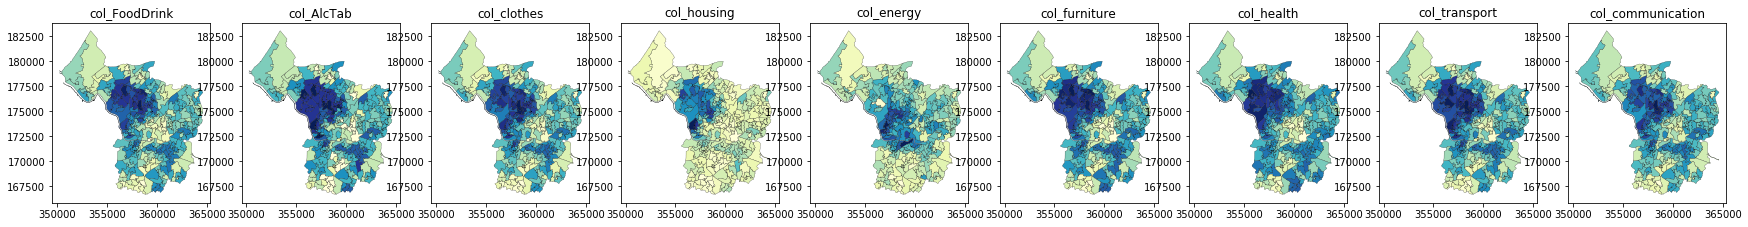

In [27]:
fig, (axs) = plt.subplots(ncols=int((len(cat_str)+1)/2), nrows=1, figsize=(30, 8))

for i in range(0, int((len(cat_str)+1)/2)):
    data_lsoa.join(data_co2[cat_str], how = 'inner')\
             .plot(ax=axs[i],
                   column=cat_str[i], 
                   cmap='YlGnBu',
                   linewidth=0.2, edgecolor='black',
                   #legend=True
                  )\
             .set_title(cat_str[i])

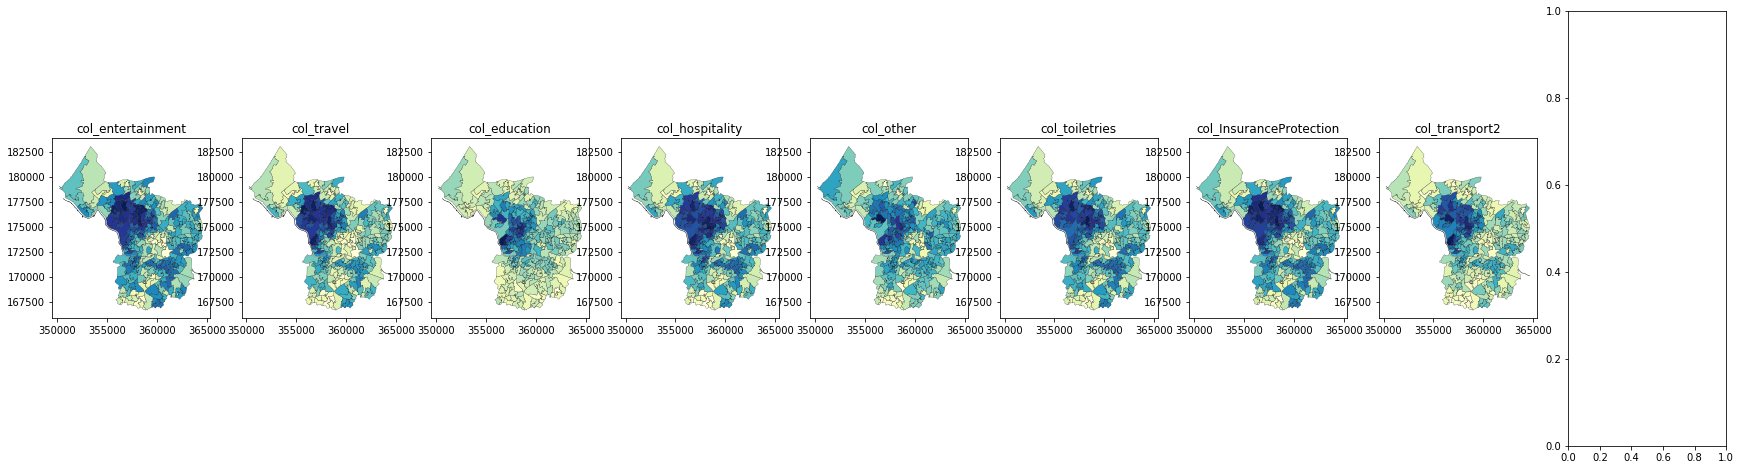

In [28]:
a = (len(cat_str) - int(len(cat_str)/2))

fig, (axs) = plt.subplots(ncols=a, nrows=1, figsize=(30, 8))

for i in range(a, len(cat_str)):
    data_lsoa.join(data_co2[cat_str], how = 'inner')\
             .plot(ax=axs[i-a],
                   column=cat_str[i], 
                   cmap='YlGnBu',
                   linewidth=0.2, edgecolor='black',
                   #legend=True
                  )\
             .set_title(cat_str[i])

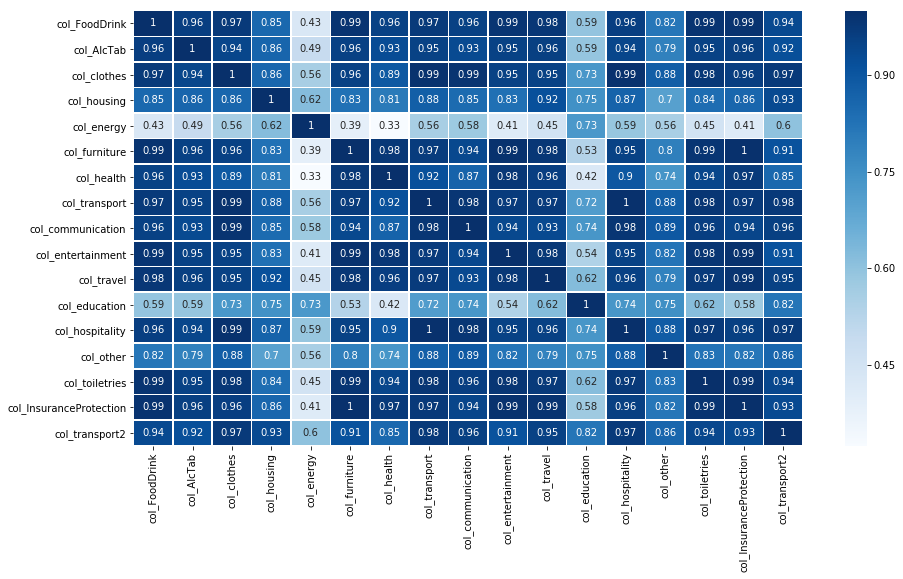

In [29]:
plt.subplots(figsize=(15,8))
sns.heatmap(data_co2[cat_str].corr(), annot=True, cmap='Blues', linewidths=.5)
plt.show()

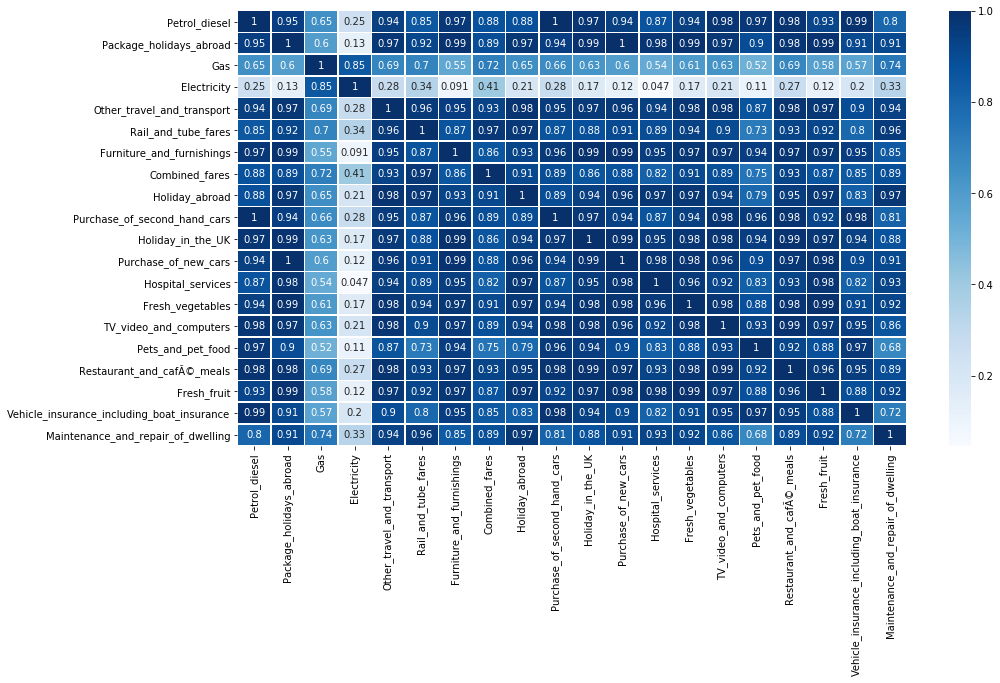

In [30]:
range_sorted = summary_co2.sort_values('range', ascending=False).T.drop(cat_str, axis=1).columns.to_list()

plt.subplots(figsize=(15,8))
sns.heatmap(data_co2[range_sorted[:20]].corr(), annot=True, cmap='Blues', linewidths=.5)
plt.show()

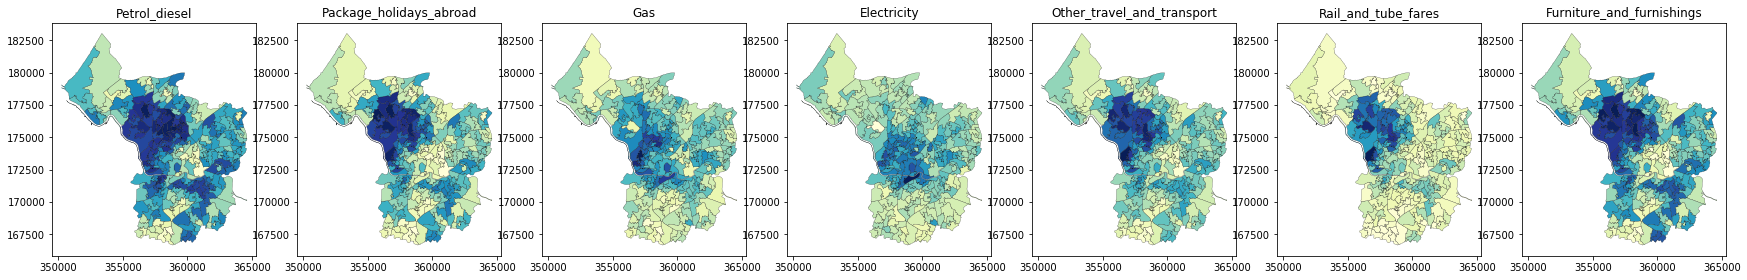

In [31]:
a = range_sorted[:7]

fig, (axs) = plt.subplots(ncols=len(a), nrows=1, figsize=(30, 8))

for i in range(len(a)):
    data_lsoa.join(data_co2[a], how = 'inner')\
             .plot(ax=axs[i],
                   column=a[i], 
                   cmap='YlGnBu',
                   linewidth=0.2, edgecolor='black',
                   #legend=True
                  )\
             .set_title(a[i])

# looks like Gas and Electricity may be more linked to housing types / efficiency than to deprivation?

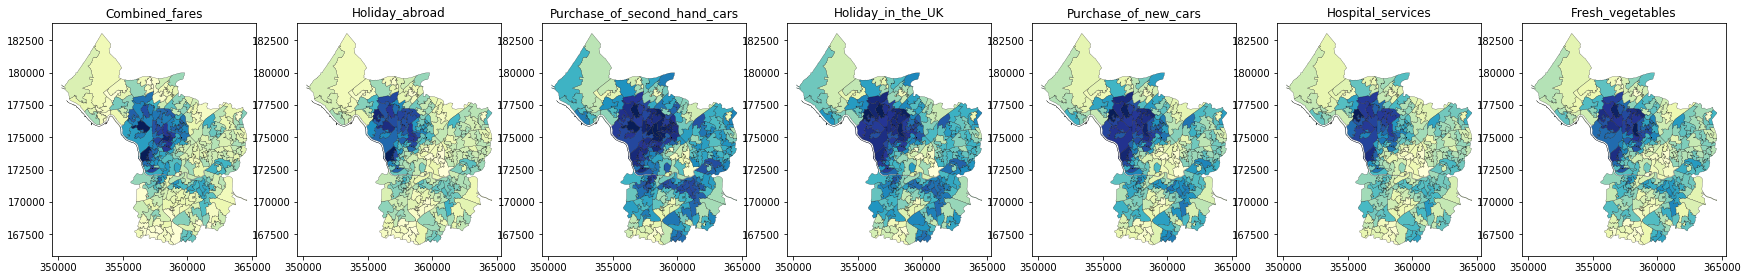

In [32]:
a = range_sorted[7:14]

fig, (axs) = plt.subplots(ncols=len(a), nrows=1, figsize=(30, 8))

for i in range(len(a)):
    data_lsoa.join(data_co2[a], how = 'inner')\
             .plot(ax=axs[i],
                   column=a[i], 
                   cmap='YlGnBu',
                   linewidth=0.2, edgecolor='black',
                   #legend=True
                  )\
             .set_title(a[i])

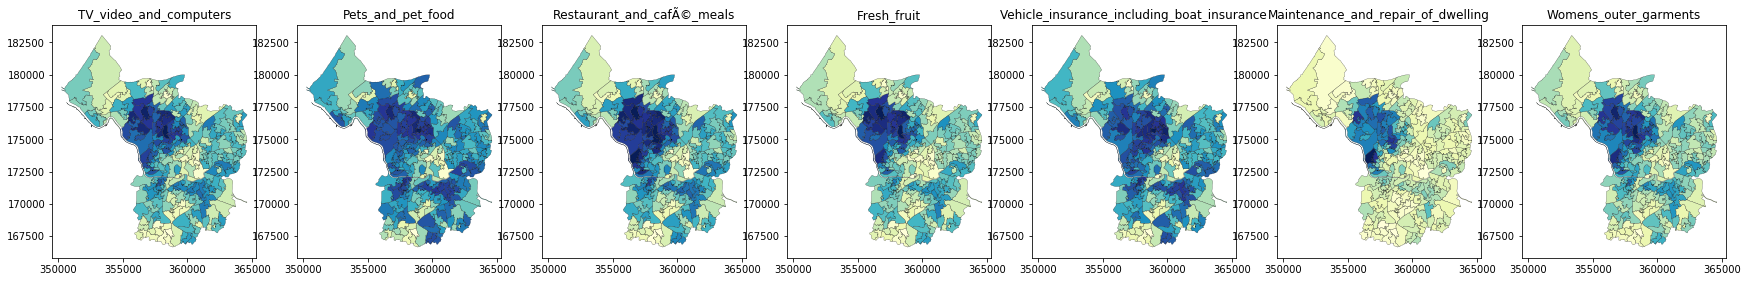

In [33]:
a = range_sorted[14:21]

fig, (axs) = plt.subplots(ncols=len(a), nrows=1, figsize=(30, 8))

for i in range(len(a)):
    data_lsoa.join(data_co2[a], how = 'inner')\
             .plot(ax=axs[i],
                   column=a[i], 
                   cmap='YlGnBu',
                   linewidth=0.2, edgecolor='black',
                   #legend=True
                  )\
             .set_title(a[i])

Text(1182.83,0.5,'Total CO2 emissions per capita')

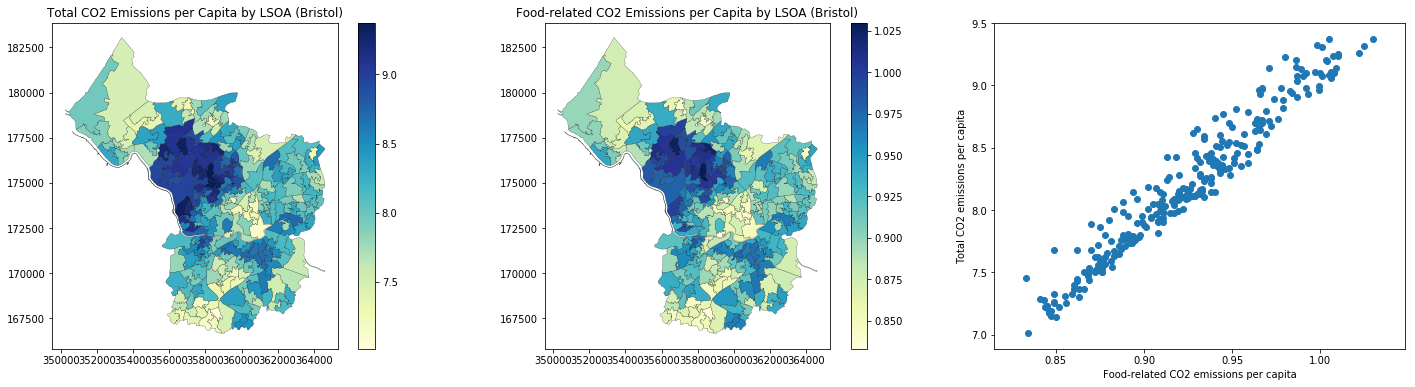

In [34]:
data_co2['food_total'] = data_co2[col_FoodDrink].sum(axis=1)

fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(25, 6))

data_lsoa.join(data_co2, how='right')\
         .plot(ax=axs[0],
               column='TOTAL', 
               cmap='YlGnBu',
               linewidth=0.2, edgecolor='black', 
               legend=True)\
         .set_title("Total CO2 Emissions per Capita by LSOA (Bristol)")

data_lsoa.join(data_co2, how='right')\
         .plot(ax=axs[1],
               column='food_total', 
               cmap='YlGnBu',
               linewidth=0.2, edgecolor='black', 
               legend=True)\
         .set_title("Food-related CO2 Emissions per Capita by LSOA (Bristol)")

axs[2] = plt.scatter(data_co2['food_total'], data_co2['TOTAL'])
plt.xlabel('Food-related CO2 emissions per capita')
plt.ylabel('Total CO2 emissions per capita')

#plt.savefig('Outputs/total_co2.png')

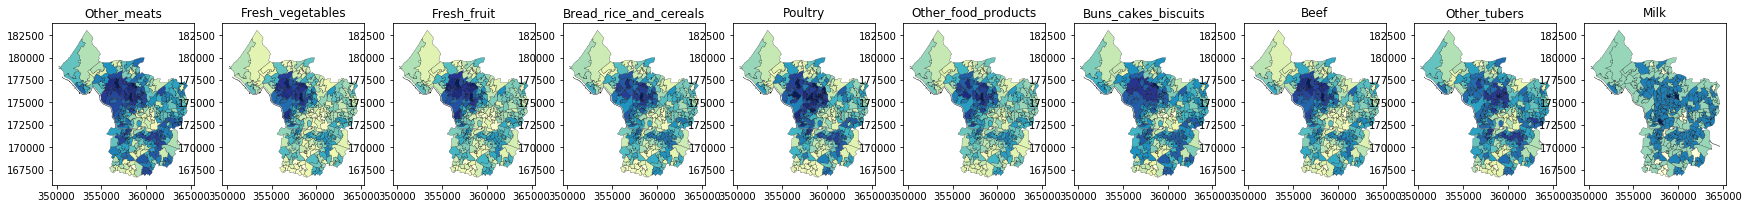

In [35]:
a = summary_co2.T[col_FoodDrink].T.sort_values('mean', # use 'range', 'mean' or 'max'
                                               ascending=False).index.to_list()[:10] # use [:10], [10:20] or [20]

fig, (axs) = plt.subplots(ncols=len(a), nrows=1, figsize=(30, 8))

for i in range(len(a)):
    data_lsoa.join(data_co2[a], how = 'inner')\
             .plot(ax=axs[i],
                   column=a[i], 
                   cmap='YlGnBu',
                   linewidth=0.2, edgecolor='black',
                   #legend=True
                  )\
             .set_title(a[i])

In [36]:
top_list = summary_co2.T[col_FoodDrink].T.sort_values('mean', ascending=False).index.to_list()[:10]

for item in summary_co2.T[col_FoodDrink].T.sort_values('range', ascending=False).index.to_list()[:10]:
    if item not in top_list:
        top_list.append(item)
        
for item in summary_co2.T[col_FoodDrink].T.sort_values('max', ascending=False).index.to_list()[:10]:
    if item not in top_list:
        top_list.append(item)
        
print(top_list)

['Other_meats', 'Fresh_vegetables', 'Fresh_fruit', 'Bread_rice_and_cereals', 'Poultry', 'Other_food_products', 'Buns_cakes_biscuits', 'Beef', 'Other_tubers', 'Milk', 'Cheese_and_curd']


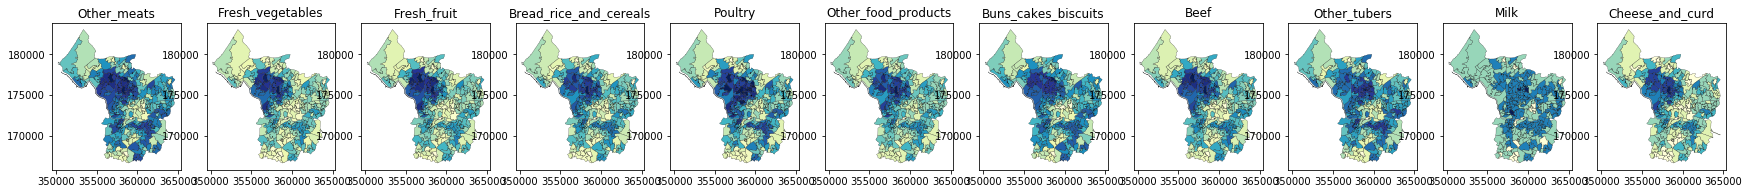

In [37]:
a = top_list

fig, (axs) = plt.subplots(ncols=len(a), nrows=1, figsize=(30, 8))

for i in range(len(a)):
    data_lsoa.join(data_co2[a], how = 'inner')\
             .plot(ax=axs[i],
                   column=a[i], 
                   cmap='YlGnBu',
                   linewidth=0.2, edgecolor='black',
                   #legend=True
                  )\
             .set_title(a[i])

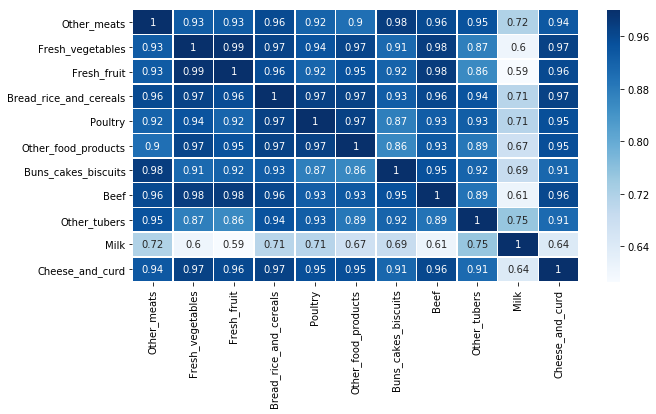

In [38]:
plt.subplots(figsize=(10, 5))
sns.heatmap(data_co2[top_list].corr(), annot=True, cmap='Blues', linewidths=.5)
plt.show()

In [39]:
'''
perishable_tup = itemgetter(4,5,6,7,8,9,10,11,12,13,14,15,16,18,20,22,25,26)(summary_co2.T[col_FoodDrink].columns.to_list())
non_perishable = [] 
perishable = []

for item in summary_co2.T[col_FoodDrink].columns.to_list():
    if item not in perishable_tup:
        non_perishable.append(item)
    else:
        perishable.append(item)
        
data_co2['tot_perishable'] = data_co2[perishable].sum(axis=1)
data_co2['tot_nonperishable'] = data_co2[non_perishable].sum(axis=1)
plt.scatter(data_co2['tot_perishable'], data_co2['tot_nonperishable'])
'''

"\nperishable_tup = itemgetter(4,5,6,7,8,9,10,11,12,13,14,15,16,18,20,22,25,26)(summary_co2.T[col_FoodDrink].columns.to_list())\nnon_perishable = [] \nperishable = []\n\nfor item in summary_co2.T[col_FoodDrink].columns.to_list():\n    if item not in perishable_tup:\n        non_perishable.append(item)\n    else:\n        perishable.append(item)\n        \ndata_co2['tot_perishable'] = data_co2[perishable].sum(axis=1)\ndata_co2['tot_nonperishable'] = data_co2[non_perishable].sum(axis=1)\nplt.scatter(data_co2['tot_perishable'], data_co2['tot_nonperishable'])\n"

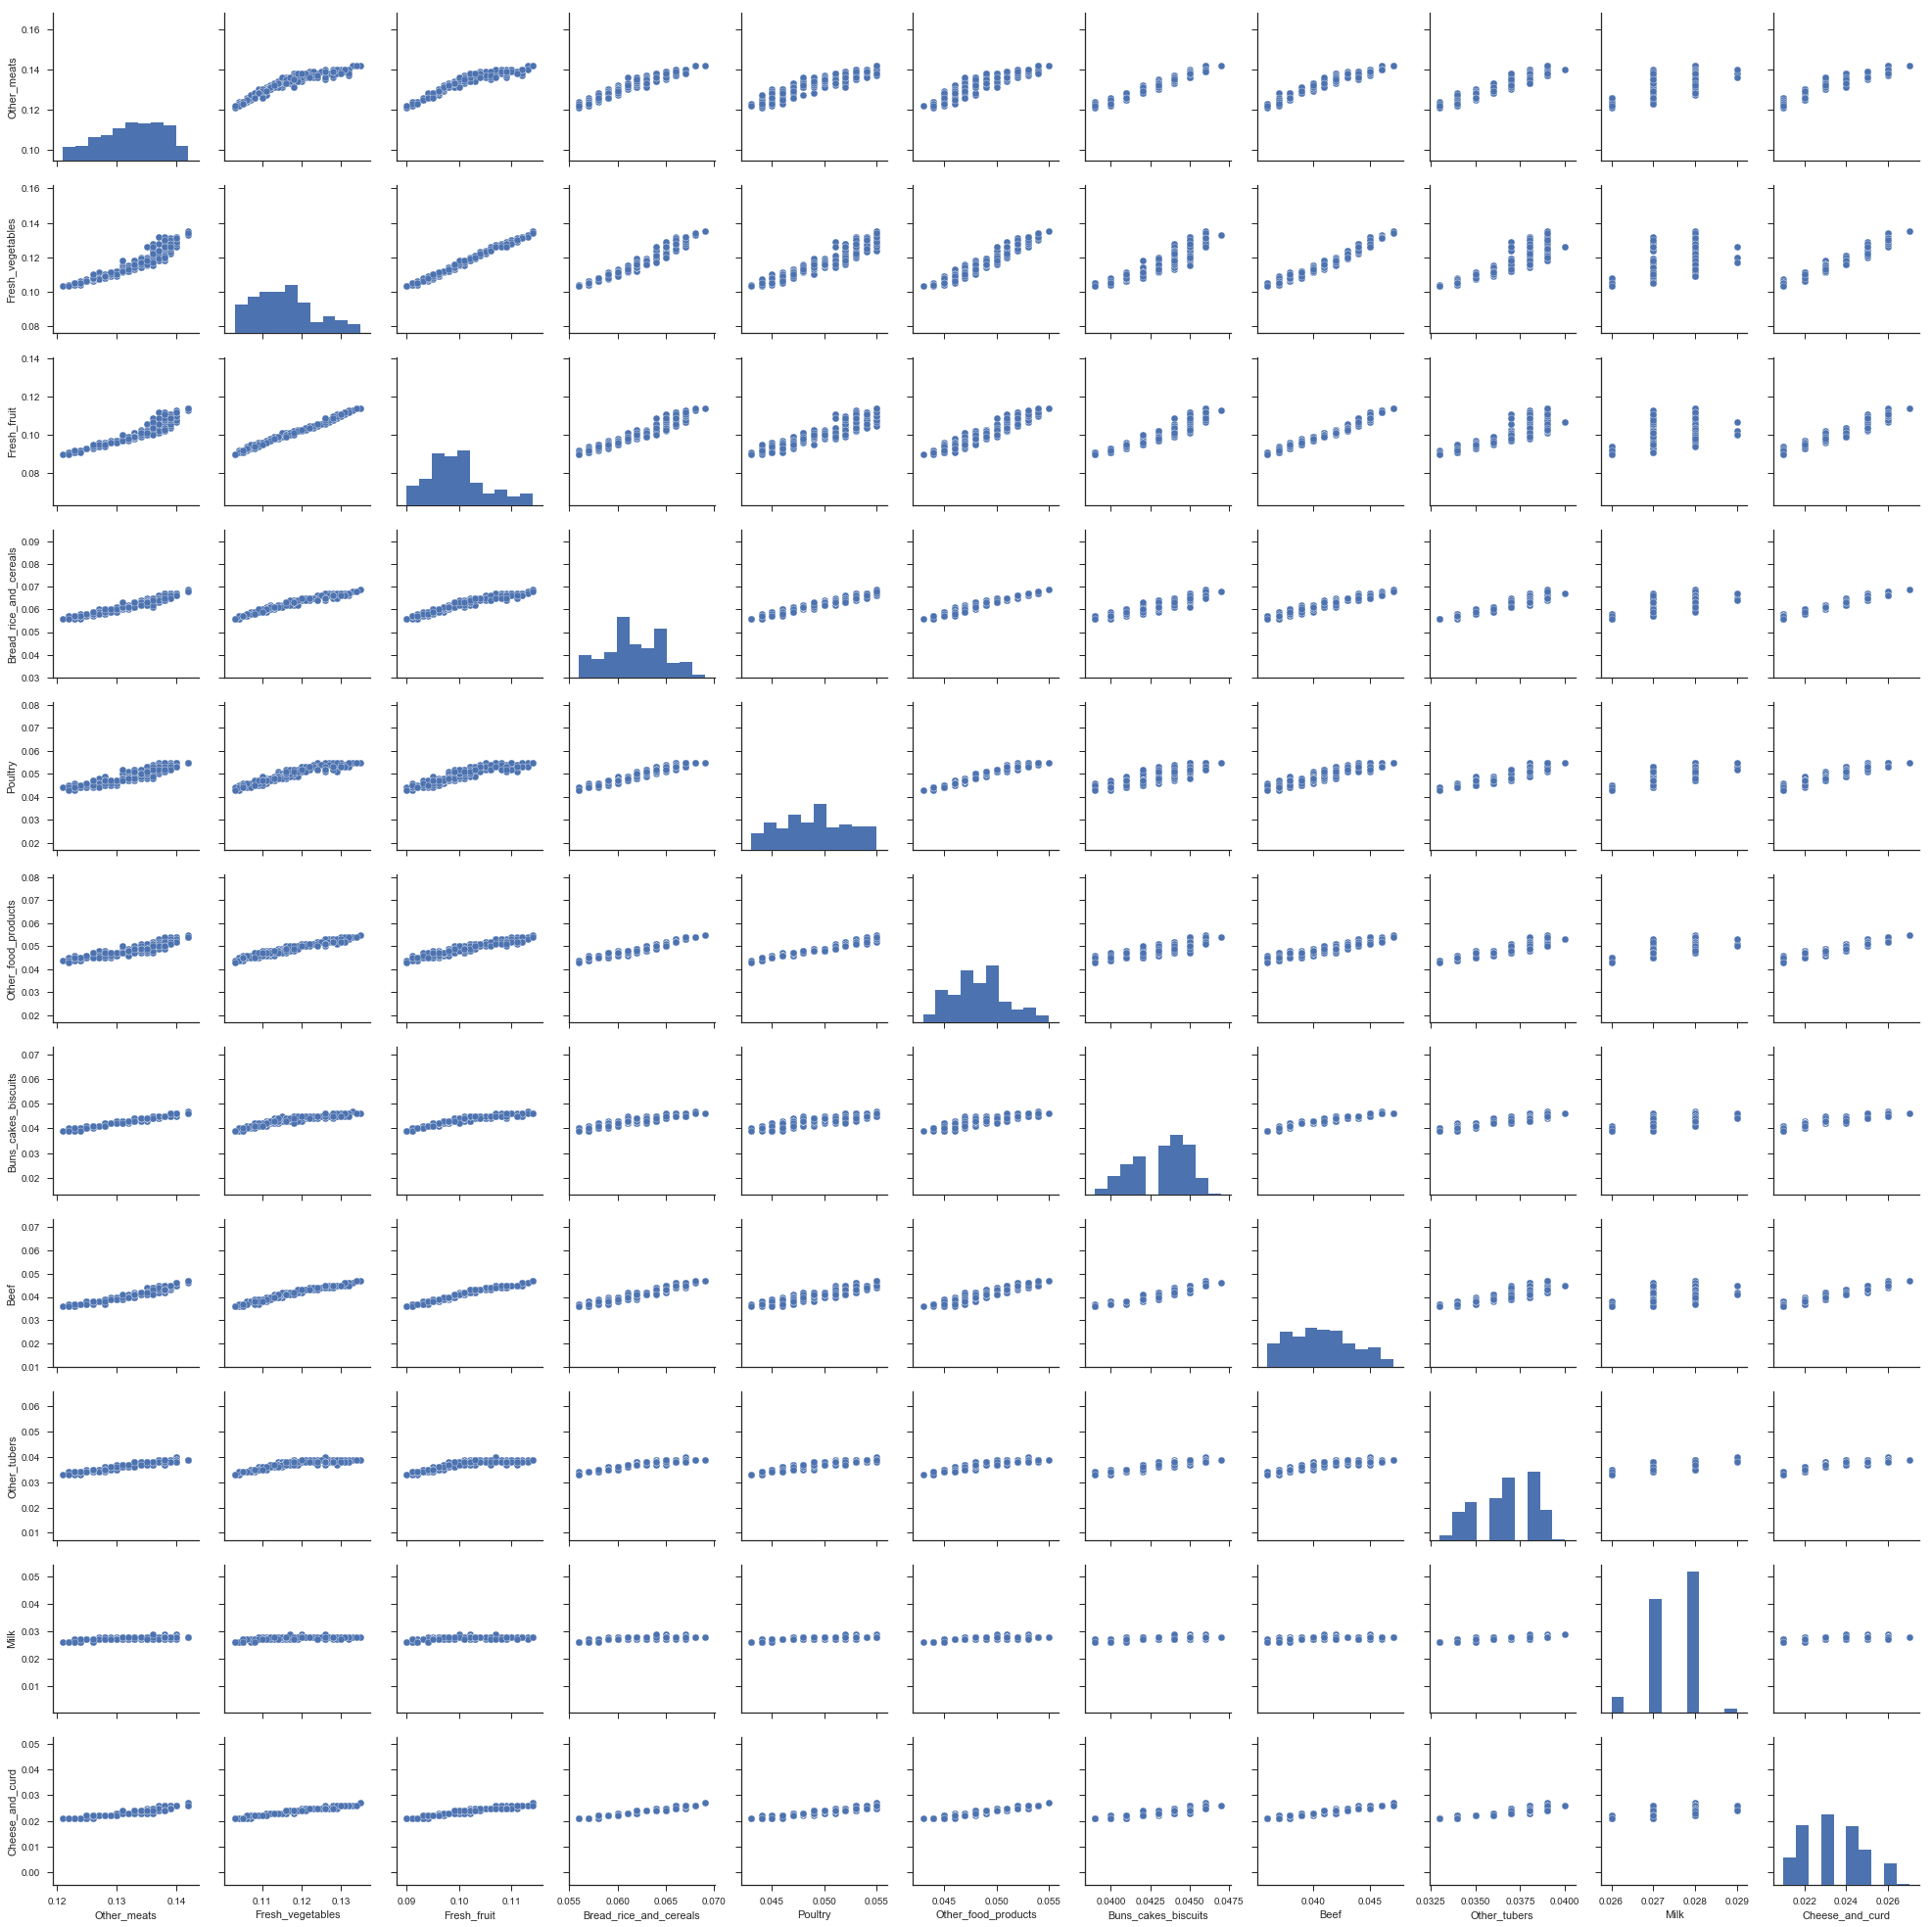

In [40]:
sns.set(style="ticks")
sns.pairplot(data_co2[top_list])

In [41]:
grains = summary_co2.T[col_FoodDrink].columns.to_list()[:2]
baked = summary_co2.T[col_FoodDrink].columns.to_list()[2:4]
meat = summary_co2.T[col_FoodDrink].columns.to_list()[4:11]
dairy_eggs = summary_co2.T[col_FoodDrink].columns.to_list()[11:16]
fats = summary_co2.T[col_FoodDrink].columns.to_list()[16:18]
fruit_veg = summary_co2.T[col_FoodDrink].columns.to_list()[18:27]
sweets_other = summary_co2.T[col_FoodDrink].columns.to_list()[27:33]
drinks_nonalc = summary_co2.T[col_FoodDrink].columns.to_list()[33:]

In [42]:
col_list = [fruit_veg, meat, grains, dairy_eggs, sweets_other, baked, drinks_nonalc, fats]
str_list = ['fruit_veg', 'meat', 'grains', 'dairy_eggs', 'sweets_other', 'baked', 'drinks_nonalc', 'fats']
tot_list = []

for i in range(len(col_list)):
    data_co2[str('total_' + str_list[i])] = data_co2[col_list[i]].sum(axis=1)
    tot_list.append(str('total_' + str_list[i]))

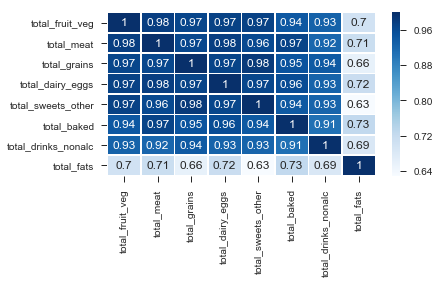

In [43]:
plt.subplots(figsize=(6,3))
sns.heatmap(data_co2[tot_list].corr(), annot=True, cmap='Blues', linewidths=.5)
plt.show()
# really high co-variance --> likely because does not control for AMOUNT actually consumed, only spending data

# look at total food and/or top_list, becasue covariance so high that there is no need for looking at these separately 

In [44]:
data_co2[tot_list].describe().T.iloc[:,1:].sort_values('mean', ascending=False)

mean       std    min    25%    50%    75%    max
total_fruit_veg      0.302555  0.016896  0.271  0.290  0.301  0.313  0.345
total_meat           0.290532  0.013358  0.263  0.280  0.291  0.301  0.320
total_dairy_eggs     0.089909  0.003694  0.083  0.087  0.090  0.092  0.098
total_sweets_other   0.079399  0.003942  0.071  0.076  0.079  0.083  0.089
total_grains         0.066757  0.003148  0.060  0.065  0.067  0.069  0.075
total_baked          0.053825  0.002321  0.048  0.052  0.054  0.056  0.059
total_drinks_nonalc  0.030935  0.002041  0.027  0.030  0.031  0.032  0.035
total_fats           0.009673  0.000579  0.009  0.009  0.010  0.010  0.011

In [45]:
'''
# Scale the data to fit between 0 and 1. This will be useful for the K-Means analysis, as euclidian distance is used. 

min_max_scaler = preprocessing.MinMaxScaler()
data_mm = pd.DataFrame(min_max_scaler.fit_transform(data_co2[tot_list]))
data_mm.index = data_co2[tot_list].index

to_keep = data_co2[tot_list].columns.to_list()
to_keep_mm = []
for var in to_keep:
    to_keep_mm.append(var + '_mm')
data_mm.columns = to_keep_mm

to_keep_mm2 = to_keep_mm[4:]
to_keep_mm2.append(to_keep_mm[0])
to_keep_mm2.append(to_keep_mm[1])
to_keep_mm2.append(to_keep_mm[2])

data_food_tot = data_co2[tot_list].join(data_mm)[to_keep_mm2]

data_food_tot.head()
'''

total_sweets_other_mm  total_baked_mm  total_drinks_nonalc_mm  \
LSOA                                                                       
E01014485               0.444444        0.545455                   0.500   
E01014486               0.333333        0.363636                   0.375   
E01014487               0.722222        0.636364                   0.625   
E01014488               0.611111        0.636364                   0.625   
E01014489               0.444444        0.454545                   0.500   

           total_fats_mm  total_fruit_veg_mm  total_meat_mm  total_grains_mm  
LSOA                                                                          
E01014485            0.5            0.405405       0.473684         0.466667  
E01014486            0.0            0.256757       0.298246         0.333333  
E01014487            0.5            0.594595       0.666667         0.666667  
E01014488            0.0            0.513514       0.649123         0.600000  
E01014489            0.5            0.337838       0.350877         0.466667

# CENSUS

In [46]:
# see Data/Census/meta_dict.json for descirptions

# tranfrom ns-sec variable
nssec = ['F359631', 'F359633', 'F359635', 'F359637', 'F359639', 'F359641', 'F359643', 'F359645']
data_ns = data_cen[nssec]

data_cen['max'] = 'empty'
data_cen.loc[data_ns.F359631 == data_ns.max(axis=1), 'max'] = 'S1'
data_cen.loc[data_ns.F359633 == data_ns.max(axis=1), 'max'] = 'S2'
data_cen.loc[data_ns.F359635 == data_ns.max(axis=1), 'max'] = 'S3'
data_cen.loc[data_ns.F359637 == data_ns.max(axis=1), 'max'] = 'S4'
data_cen.loc[data_ns.F359639 == data_ns.max(axis=1), 'max'] = 'S5'
data_cen.loc[data_ns.F359641 == data_ns.max(axis=1), 'max'] = 'S6'
data_cen.loc[data_ns.F359643 == data_ns.max(axis=1), 'max'] = 'S7'
data_cen.loc[data_ns.F359645 == data_ns.max(axis=1), 'max'] = 'S8'

# Create Dummy Variables
nssec_dm = pd.get_dummies(data_cen['max'], prefix='nssec')
data_cen = data_cen.join(nssec_dm)
#data_cen = data_cen.drop(['nssec_S8'], axis=1)

#transform other variables
data_cen['emp_ft'] = data_cen['F1393'] + data_cen['F1395'] + data_cen['F1397']
data_cen['bdr_1p'] = data_cen['F2071'] + data_cen['F2073']
data_cen['eth_w'] = data_cen['F1664'] + data_cen['F1665'] + data_cen['F1666'] + data_cen['F1667']
data_cen['eth_w_ln'] = 1/(data_cen['eth_w'])
data_cen['sec8_ln'] = np.log(data_cen['F359645'])
data_cen['buk_ln'] = np.log(data_cen['F884'])
data_cen['eur'] = data_cen['F1221'] + data_cen['F1233']
data_cen['noneur'] = 1-data_cen['eur']
data_cen['ptrs'] = data_cen['F209'] + data_cen['F210']

# All

In [47]:
'''
col_list = data.columns.to_list()

fig, (axs) = plt.subplots(ncols=len(col_list), nrows=1, figsize=(30, 8))

for i in range(len(col_list)):
    data_lsoa.join(data, how = 'inner').dropna(axis=1)\
             .plot(ax=axs[i],
                   column=col_list[i], 
                   cmap='YlGnBu',
                   linewidth=0.2, edgecolor='black',
                   #legend=True
                  )\
             .set_title(col_list[i])
'''

"\ncol_list = data.columns.to_list()\n\nfig, (axs) = plt.subplots(ncols=len(col_list), nrows=1, figsize=(30, 8))\n\nfor i in range(len(col_list)):\n    data_lsoa.join(data, how = 'inner').dropna(axis=1)             .plot(ax=axs[i],\n                   column=col_list[i], \n                   cmap='YlGnBu',\n                   linewidth=0.2, edgecolor='black',\n                   #legend=True\n                  )             .set_title(col_list[i])\n"

In [48]:
data_co2['food_total'] = data_co2[col_FoodDrink].sum(axis=1)

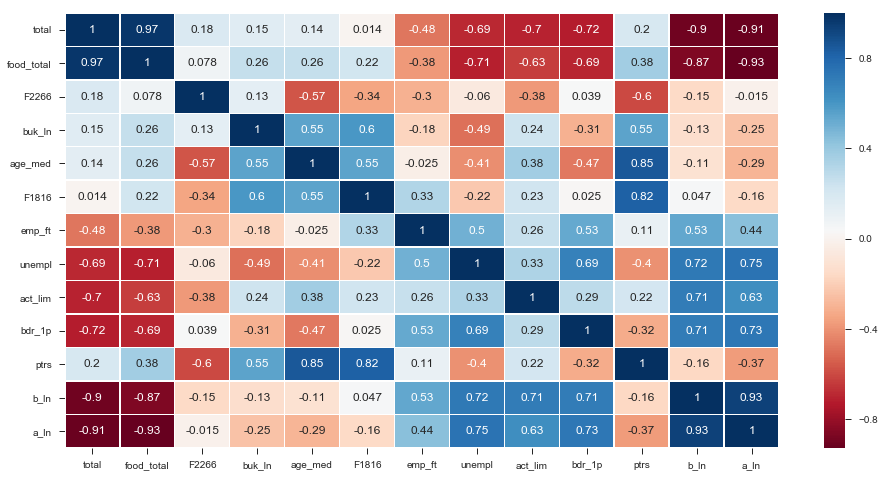

In [49]:
col_names={'F185':'age_med', 'F184':'age_mean', 'F1916':'act_lim', 'F1399':'unempl', 'TOTAL':'total'}

cen_keep = ['F2266', 'buk_ln', 'F185', 'F1816', 'emp_ft', 'F1399', 'F1916', 'bdr_1p', 'ptrs']
data_co2['food_total'] = data_co2[col_FoodDrink].sum(axis=1)
data = data_co2[['TOTAL', 'food_total']].join(data_cen[cen_keep], how='inner').join(data_imd[['b_ln', 'a_ln']]).rename(columns=col_names)

plt.subplots(figsize=(16,8))
sns.heatmap(data.corr(), annot=True, cmap='RdBu', linewidths=.5)
plt.show()

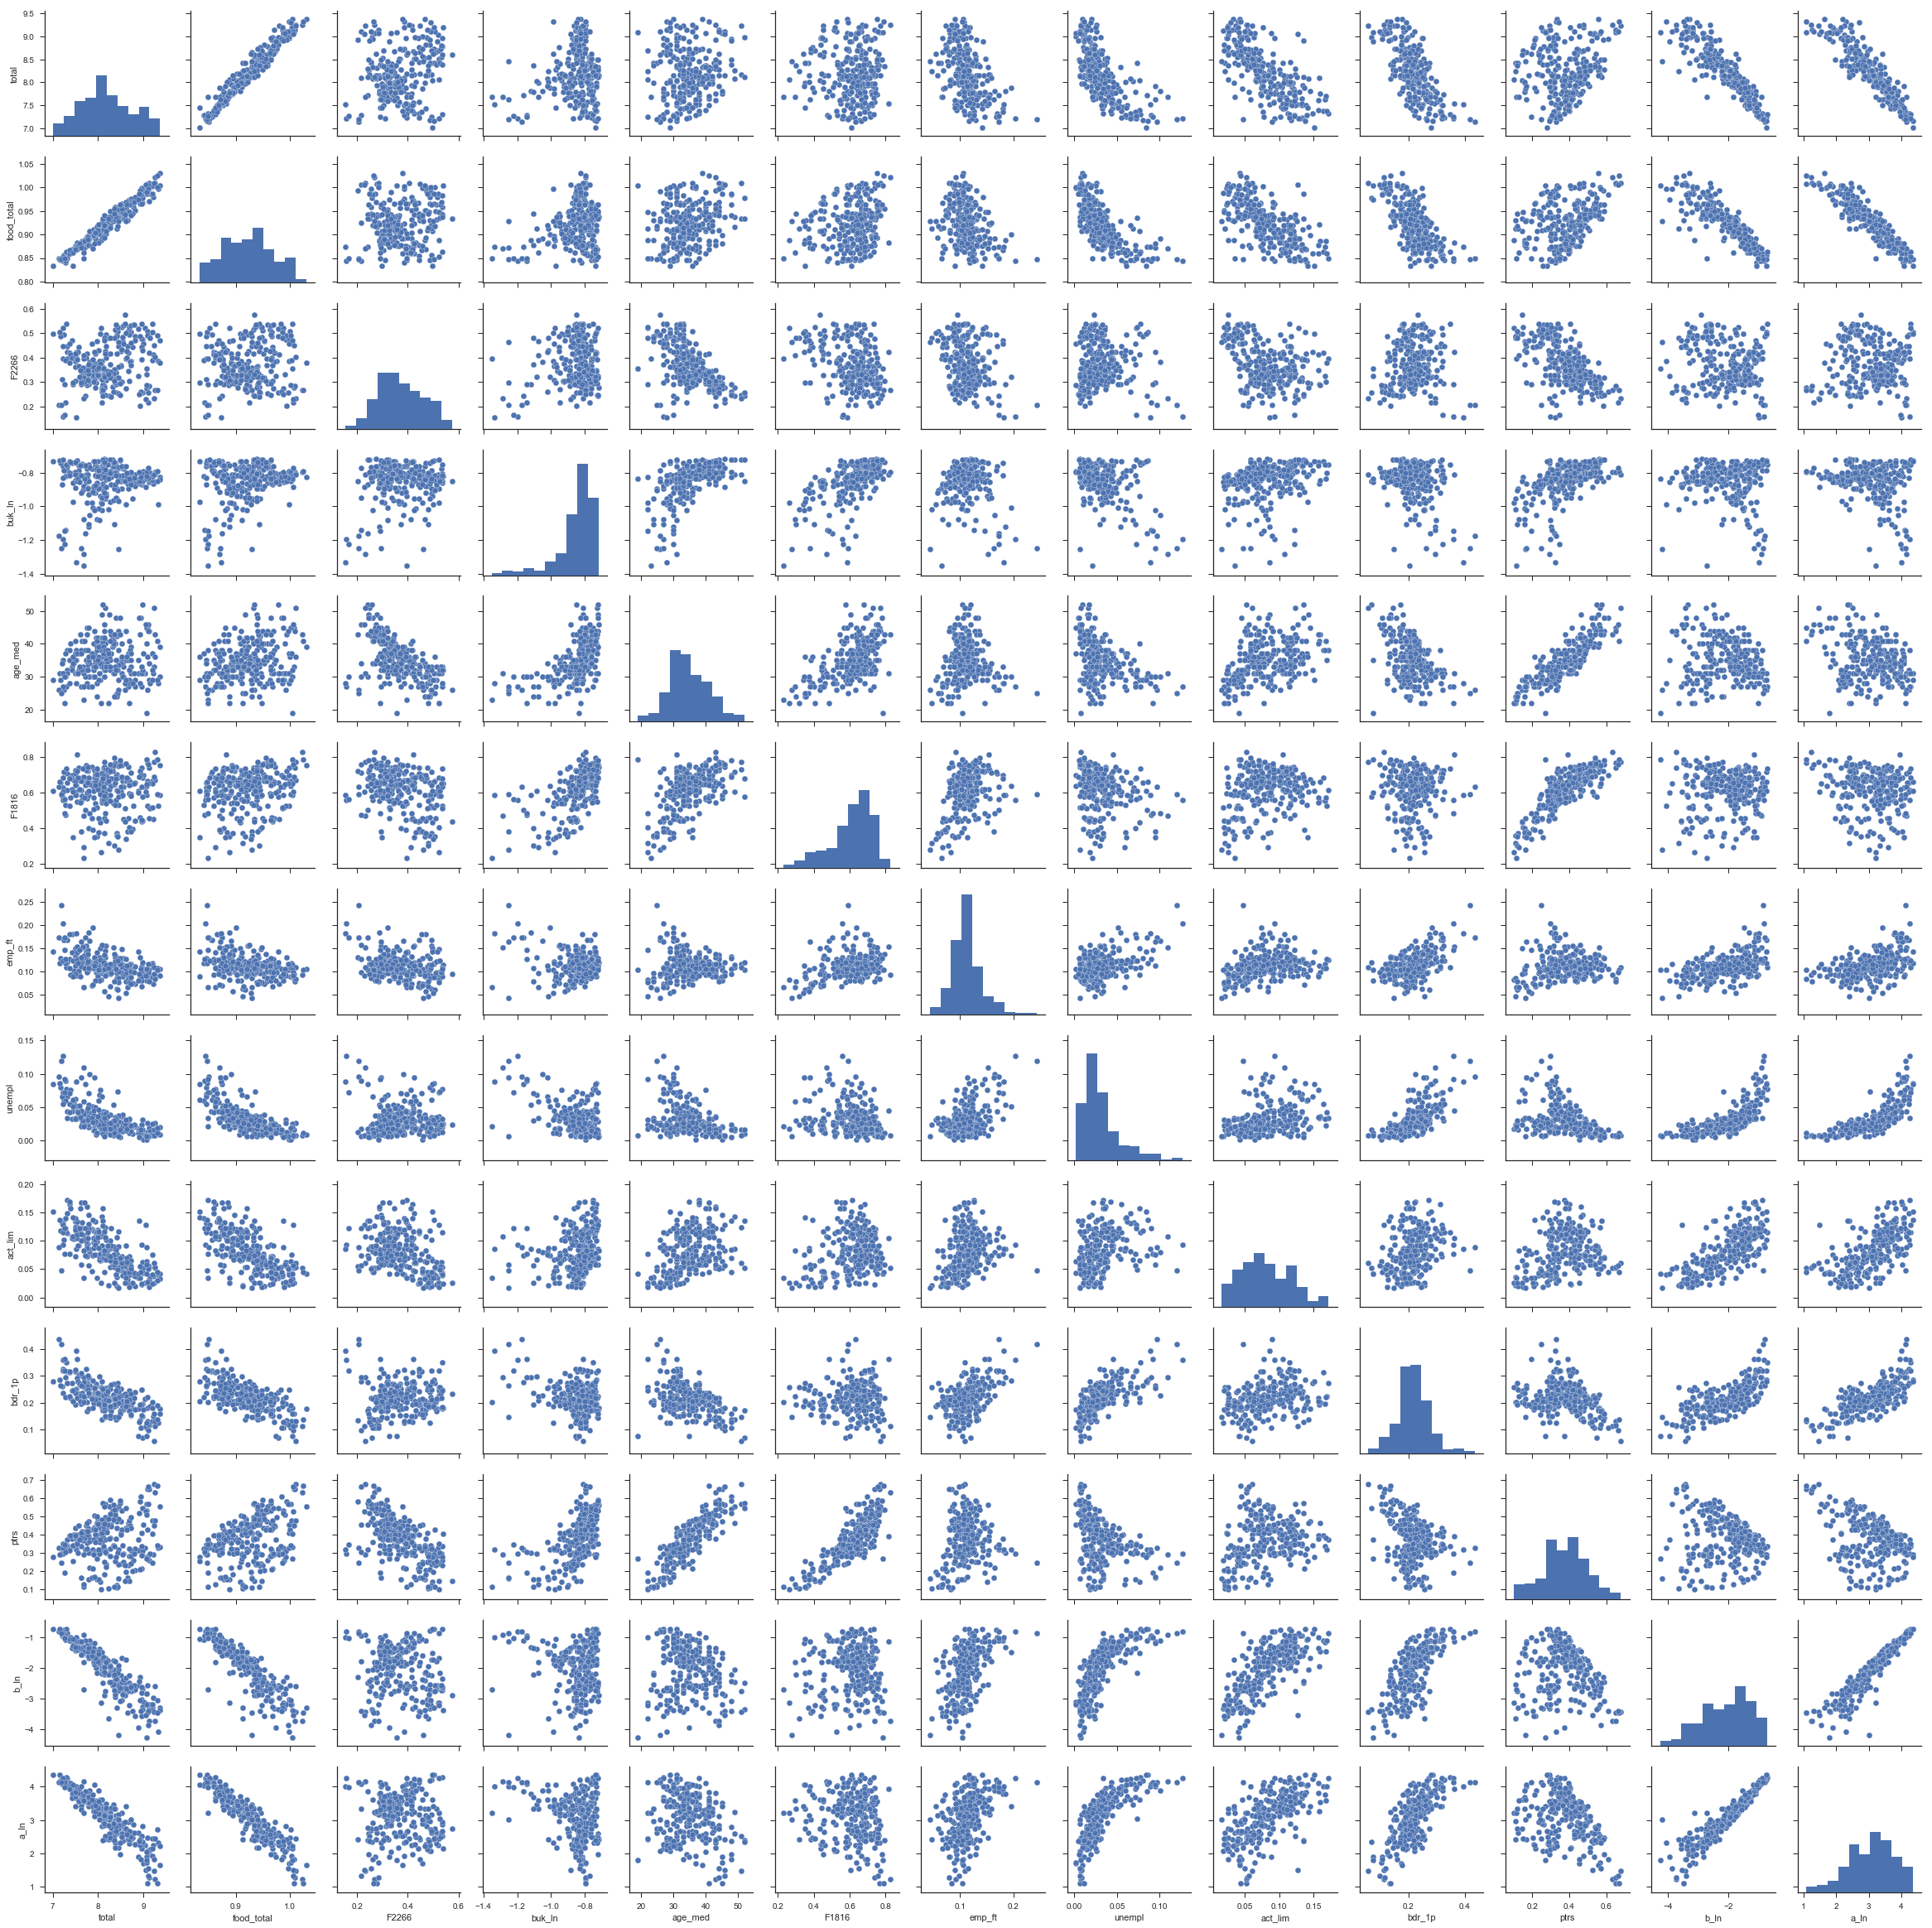

In [50]:
sns.set(style="ticks")
sns.pairplot(data)

# Regression

In [51]:
data.head()

total  food_total     F2266    buk_ln  age_med     F1816    emp_ft  \
LSOA                                                                            
E01014485  8.178       0.922  0.492570 -0.924997     33.0  0.568571  0.156212   
E01014486  7.806       0.891  0.381096 -1.052848     30.0  0.482446  0.165730   
E01014487  8.783       0.959  0.534500 -0.857432     28.0  0.523169  0.110512   
E01014488  8.519       0.947  0.523833 -0.896050     31.0  0.581699  0.148148   
E01014489  8.044       0.908  0.496879 -0.939125     29.0  0.431567  0.150772   

             unempl   act_lim    bdr_1p      ptrs      b_ln      a_ln  
LSOA                                                                   
E01014485  0.034440  0.068244  0.211353  0.236253 -1.720314  3.158362  
E01014486  0.100187  0.079845  0.226015  0.219672 -1.087643  3.892677  
E01014487  0.020216  0.039000  0.177045  0.261837 -2.717949  2.853939  
E01014488  0.035760  0.051179  0.225847  0.242259 -1.660679  3.204331  
E01014489  0.076294  0.065751  0.201754  0.144775 -1.514082  3.622125

In [52]:
m5=sm.ols('total ~ a_ln + F2266', data).fit()
m5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  total   R-squared:                       0.865
Model:                            OLS   Adj. R-squared:                  0.864
Method:                 Least Squares   F-statistic:                     830.5
Date:                Mon, 01 Apr 2019   Prob (F-statistic):          1.22e-113
Time:                        10:36:22   Log-Likelihood:                 40.591
No. Observations:                 263   AIC:                            -75.18
Df Residuals:                     260   BIC:                            -64.47
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     10.0390      0.080    125.789      0.000       9.882      10.196
a_ln          -0.7293      0.018    -39.976      0.000      -0.765      -0.693
F2266          1.0694      0.146      7.317      0.000       0.782       1.357
==============================================================================
Omnibus:                        4.928   Durbin-Watson:                   1.559
Prob(Omnibus):                  0.085   Jarque-Bera (JB):                4.669
Skew:                           0.269   Prob(JB):                       0.0968
Kurtosis:                       3.370   Cond. No.                         40.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [53]:
m5f=sm.ols('food_total ~ a_ln + F2266', data).fit()
m5f.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             food_total   R-squared:                       0.862
Model:                            OLS   Adj. R-squared:                  0.861
Method:                 Least Squares   F-statistic:                     810.6
Date:                Mon, 01 Apr 2019   Prob (F-statistic):          1.86e-112
Time:                        10:36:22   Log-Likelihood:                 701.75
No. Observations:                 263   AIC:                            -1397.
Df Residuals:                     260   BIC:                            -1387.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.0934      0.006    169.242      0.000       1.081       1.106
a_ln          -0.0593      0.001    -40.121      0.000      -0.062      -0.056
F2266          0.0328      0.012      2.772      0.006       0.009       0.056
==============================================================================
Omnibus:                        7.524   Durbin-Watson:                   1.732
Prob(Omnibus):                  0.023   Jarque-Bera (JB):               11.889
Skew:                          -0.113   Prob(JB):                      0.00262
Kurtosis:                       4.017   Cond. No.                         40.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [54]:
m4=sm.ols('total ~ b_ln + F1816', data).fit()
m4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  total   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     576.5
Date:                Mon, 01 Apr 2019   Prob (F-statistic):           2.67e-96
Time:                        10:36:22   Log-Likelihood:                0.20274
No. Observations:                 263   AIC:                             5.595
Df Residuals:                     260   BIC:                             16.31
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.7112      0.091     73.765      0.000       6.532       6.890
b_ln          -0.6343      0.019    -33.952      0.000      -0.671      -0.598
F1816          0.2745      0.129      2.121      0.035       0.020       0.529
==============================================================================
Omnibus:                       19.253   Durbin-Watson:                   1.760
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               40.643
Skew:                          -0.351   Prob(JB):                     1.49e-09
Kurtosis:                       4.794   Cond. No.                         25.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [55]:
m3=sm.ols('total ~ b_ln + ptrs', data).fit()
m3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  total   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     575.9
Date:                Mon, 01 Apr 2019   Prob (F-statistic):           3.00e-96
Time:                        10:36:22   Log-Likelihood:               0.085144
No. Observations:                 263   AIC:                             5.830
Df Residuals:                     260   BIC:                             16.55
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.7970      0.059    115.582      0.000       6.681       6.913
b_ln          -0.6263      0.019    -33.117      0.000      -0.663      -0.589
ptrs           0.2627      0.127      2.065      0.040       0.012       0.513
==============================================================================
Omnibus:                       20.679   Durbin-Watson:                   1.744
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               44.564
Skew:                          -0.376   Prob(JB):                     2.10e-10
Kurtosis:                       4.871   Cond. No.                         21.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [56]:
m2=sm.ols('total ~ age_med + b_ln', data).fit()
m2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  total   R-squared:                       0.814
Model:                            OLS   Adj. R-squared:                  0.813
Method:                 Least Squares   F-statistic:                     570.2
Date:                Mon, 01 Apr 2019   Prob (F-statistic):           8.54e-96
Time:                        10:36:22   Log-Likelihood:               -0.97268
No. Observations:                 263   AIC:                             7.945
Df Residuals:                     260   BIC:                             18.66
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.7632      0.092     73.749      0.000       6.583       6.944
age_med        0.0036      0.002      1.465      0.144      -0.001       0.008
b_ln          -0.6294      0.019    -33.365      0.000      -0.667      -0.592
==============================================================================
Omnibus:                       26.015   Durbin-Watson:                   1.750
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               60.267
Skew:                          -0.463   Prob(JB):                     8.19e-14
Kurtosis:                       5.155   Cond. No.                         217.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [57]:
'''#compare distributions of predicted and actual values for both models 
f,ax=plt.subplots(1, figsize=(9, 6))
sns.kdeplot(data['total'], shade=True, ax=ax, label='$y$')
sns.kdeplot(m1.fittedvalues, shade=True, ax=ax, label='$\hat{y}$')

plt.show()'''

"#compare distributions of predicted and actual values for both models \nf,ax=plt.subplots(1, figsize=(9, 6))\nsns.kdeplot(data['total'], shade=True, ax=ax, label='$y$')\nsns.kdeplot(m1.fittedvalues, shade=True, ax=ax, label='$\\hat{y}$')\n\nplt.show()"

# Spatial weights

In [58]:
spatial_data = data_lsoa.join(data, how='inner')

In [59]:
spatial_data.head()

FID_1     geo_label geo_labelw  Count_  \
E01014584     66  Bristol 045E       None       1   
E01014539    114  Bristol 025A       None       1   
E01014504    380  Bristol 041B       None       1   
E01014654    430  Bristol 056A       None       1   
E01014669    540  Bristol 020D       None       1   

                                                    geometry  total  \
E01014584  POLYGON ((358645.634 170187.736, 358640.859 17...  7.539   
E01014539  POLYGON ((358951 174048, 358959.518 174040.699...  8.664   
E01014504  POLYGON ((357372.001 171182.194, 357369.784 17...  8.538   
E01014654  POLYGON ((360104.977 174206.128, 360105.018 17...  7.521   
E01014669  POLYGON ((358550 175095, 358551 175095, 358551...  9.375   

           food_total     F2266    buk_ln  age_med     F1816    emp_ft  \
E01014584       0.882  0.422828 -0.808689     31.0  0.814727  0.154506   
E01014539       0.950  0.509815 -0.894848     27.0  0.456425  0.096234   
E01014504       0.952  0.466311 -0.761473     34.0  0.662544  0.089368   
E01014654       0.873  0.154111 -1.334700     28.0  0.584722  0.181607   
E01014669       1.005  0.468439 -0.838807     30.0  0.586466  0.090756   

             unempl   act_lim    bdr_1p      ptrs      b_ln      a_ln  
E01014584  0.045064  0.105528  0.363248  0.390244 -1.139403  3.938237  
E01014539  0.016736  0.038713  0.201531  0.232348 -2.733214  2.643548  
E01014504  0.038521  0.064043  0.201220  0.343505 -2.407835  2.918420  
E01014654  0.088475  0.086096  0.394767  0.321494 -0.991526  3.999979  
E01014669  0.020168  0.033223  0.161031  0.332271 -3.381101  2.209484

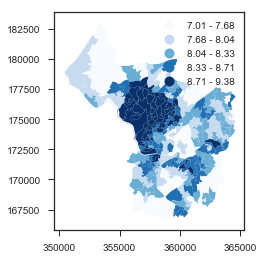

In [60]:
spatial_data.plot(column = 'total', scheme = 'quantiles', cmap ='Blues', legend = True)

In [84]:
spatial_data.reset_index().to_file('Data/Spatial/spatial_data.shp')

In [95]:
# BINARY WEIGHTS
# two observations are neighbours if they share one point
w_queen = ps.weights.Queen.from_dataframe(spatial_data)

# two observations are neighbours if they share a boundary line
w_rook = ps.weights.Rook.from_dataframe(spatial_data)

# k nearest neighbours, will use centroids as default. If you don't want use centroids, used ps.knnW_from_array()
knn5 = ps.weights.KNN.from_dataframe(spatial_data, k=5)

# distance bands (by radius from centroid)
w_dist1kmB = ps.threshold_binaryW_from_shapefile('Data/Spatial/spatial_data.shp', 1000, idVariable='index') # distance bands are by metres

C:\Users\gylk\AppData\Local\Continuum\anaconda3\lib\site-packages\pysal\weights\weights.py:189: UserWarning: There are 2 disconnected observations
  warnings.warn("There are %d disconnected observations" % ni)
C:\Users\gylk\AppData\Local\Continuum\anaconda3\lib\site-packages\pysal\weights\weights.py:190: UserWarning: Island ids: 78, 144
  warnings.warn("Island ids: %s" % ', '.join(str(island) for island in self.islands))
C:\Users\gylk\AppData\Local\Continuum\anaconda3\lib\site-packages\pysal\weights\weights.py:189: UserWarning: There are 2 disconnected observations
  warnings.warn("There are %d disconnected observations" % ni)
C:\Users\gylk\AppData\Local\Continuum\anaconda3\lib\site-packages\pysal\weights\weights.py:190: UserWarning: Island ids: 78, 144
  warnings.warn("Island ids: %s" % ', '.join(str(island) for island in self.islands))


In [105]:
# CONTINUOUS WEIGHTS
# continuous weights. Each observation within the radius is assigned a weight dependent on the distance (weight=1/distance)
w_dist1kmC = ps.threshold_continuousW_from_shapefile('Data/Spatial/spatial_data.shp', 1000, idVariable='index')

# how to choose distance band? 
# to not overlaod spatial weights, calculate minimum thershold and then use this as the distance band
min_thr = ps.min_threshold_dist_from_shapefile('Data/Spatial/spatial_data.shp')
w_min_dist = ps.threshold_continuousW_from_shapefile('Data/Spatial/spatial_data.shp', min_thr, idVariable='index')

C:\Users\gylk\AppData\Local\Continuum\anaconda3\lib\site-packages\pysal\weights\weights.py:189: UserWarning: There are 2 disconnected observations
  warnings.warn("There are %d disconnected observations" % ni)
C:\Users\gylk\AppData\Local\Continuum\anaconda3\lib\site-packages\pysal\weights\weights.py:190: UserWarning: Island ids: 78, 144
  warnings.warn("Island ids: %s" % ', '.join(str(island) for island in self.islands))
C:\Users\gylk\AppData\Local\Continuum\anaconda3\lib\site-packages\pysal\weights\weights.py:189: UserWarning: There are 2 disconnected observations
  warnings.warn("There are %d disconnected observations" % ni)
C:\Users\gylk\AppData\Local\Continuum\anaconda3\lib\site-packages\pysal\weights\weights.py:190: UserWarning: Island ids: 78, 144
  warnings.warn("Island ids: %s" % ', '.join(str(island) for island in self.islands))


In [ ]:
# Block Weights, weights by group membership, here we use MSOAs

spatial_data = spatial_data.join(pd.read_csv('Data/Footprint/bristol_CO2_data', encoding='latin-1').set_index('LSOA')[['MSOA']])
w_block = ps.block_weights(spatial_data['MSOA'])
w_block[0]


w_block.remap_ids(spatial_data.index)
w_block['E01014539']



In [62]:
# Viewing and analysing weights
print(
    w_queen['E01014539'], '\n',
    w_queen['E01014539']['E01014542'], '\n',
    w_queen.neighbors['E01014539'], '\n',
    w_queen.weights['E01014539'], '\n',
    w_queen.cardinalities['E01014539']
)

{'E01014563': 1.0, 'E01014557': 1.0, 'E01014542': 1.0, 'E01033367': 1.0, 'E01033342': 1.0, 'E01014538': 1.0} 
 1.0 
 ['E01014563', 'E01014557', 'E01014542', 'E01033367', 'E01033342', 'E01014538'] 
 [1.0, 1.0, 1.0, 1.0, 1.0, 1.0] 
 6


In [63]:
queen_card = pd.Series(w_queen.cardinalities)
queen_card.head()

E01014584    4
E01014539    6
E01014504    6
E01014654    6
E01014669    6
dtype: int64

C:\Users\gylk\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


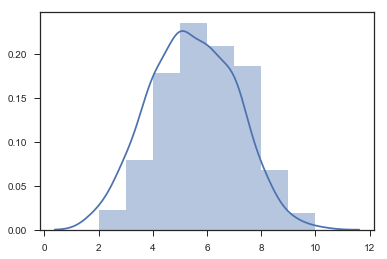

In [64]:
sns.distplot(queen_card, bins=8)

In [65]:
print(w_queen.n, '\n', # Number of observations
      w_queen.mean_neighbors, '\n', # Average number of neighbors
      w_queen.min_neighbors, '\n', # Min number of neighbors
      w_queen.max_neighbors, '\n', # Max number of neighbors
      w_queen.islands, '\n', # Islands (observations disconnected)
      w_queen.id_order[:5] # Order of IDs (first five only in this case)
     )

263 
 5.4600760456273765 
 2 
 10 
 [] 
 ['E01014584', 'E01014539', 'E01014504', 'E01014654', 'E01014669']


(356000, 360000)

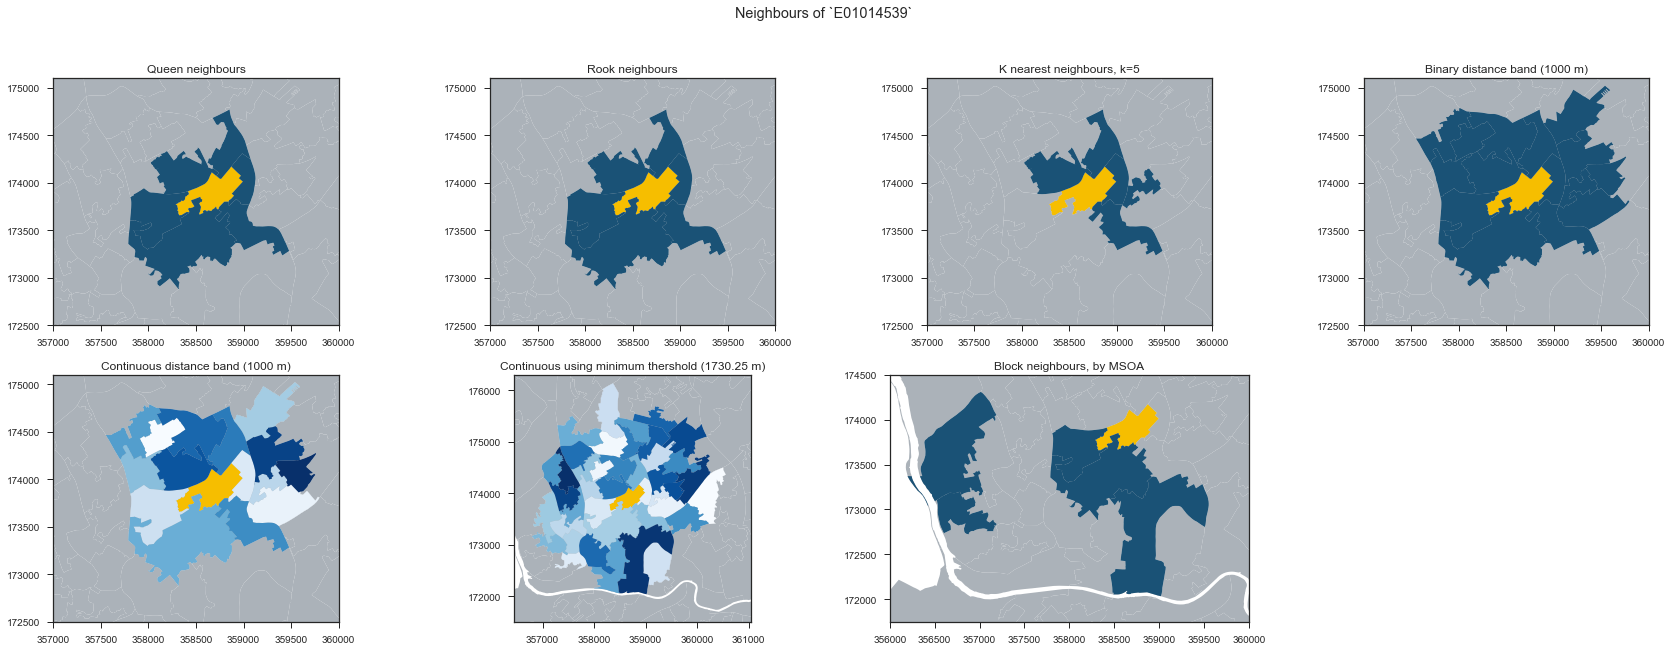

In [461]:
# Setup figure
#f, ((ax1, ax2, ax3, ax4), (ax5, ax6, ax7)) = plt.subplots(nrows=2, ncols=4, figsize=(30, 10))
#

f = plt.figure(figsize=(30, 10))
f.suptitle("Neighbours of `E01014539`")

ax1 = plt.subplot2grid((2, 4), (0, 0))
ax2 = plt.subplot2grid((2, 4), (0, 1))
ax3 = plt.subplot2grid((2, 4), (0, 2))
ax4 = plt.subplot2grid((2, 4), (0, 3))
ax5 = plt.subplot2grid((2, 4), (1, 0))
ax6 = plt.subplot2grid((2, 4), (1, 1))
ax7 = plt.subplot2grid((2, 4), (1, 2))

# Plot base layer of polygons
spatial_data.plot(ax=ax1, facecolor='#abb2b9', linewidth=0.1)
# Select focal polygon
# NOTE we pass both the area code and the column name
#      (`geometry`) within brackets!!!
focus = spatial_data.loc[['E01014539'], ['geometry']]
# Plot focal polygon
focus.plot(facecolor='#f6be00', alpha=1, linewidth=0, ax=ax1)
# Plot neighbors
neis = spatial_data.loc[w_queen['E01014539'], :]
neis.plot(ax=ax1, facecolor='#1a5276', linewidth=0)
# Title
ax1.set_title("Queen neighbours")
# Style and display on screen
ax1.set_ylim(172500, 175100)
ax1.set_xlim(357000, 360000)

spatial_data.plot(ax=ax2, facecolor='#abb2b9', linewidth=0.1)
focus = spatial_data.loc[['E01014539'], ['geometry']]
focus.plot(facecolor='#f6be00', alpha=1, linewidth=0, ax=ax2)
neis = spatial_data.loc[w_rook['E01014539'], :]
neis.plot(ax=ax2, facecolor='#1a5276', linewidth=0)
ax2.set_title("Rook neighbours")
ax2.set_ylim(172500, 175100)
ax2.set_xlim(357000, 360000)

spatial_data.plot(ax=ax3, facecolor='#abb2b9', linewidth=0.1)
focus = spatial_data.loc[['E01014539'], ['geometry']]
focus.plot(facecolor='#f6be00', alpha=1, linewidth=0, ax=ax3)
neis = spatial_data.loc[knn5['E01014539'], :]
neis.plot(ax=ax3, facecolor='#1a5276', linewidth=0)
ax3.set_title("K nearest neighbours, k=5")
ax3.set_ylim(172500, 175100)
ax3.set_xlim(357000, 360000)

spatial_data.plot(ax=ax4, facecolor='#abb2b9', linewidth=0.1)
focus = spatial_data.loc[['E01014539'], ['geometry']]
focus.plot(facecolor='#f6be00', alpha=1, linewidth=0, ax=ax4)
neis = spatial_data.loc[w_dist1kmB['E01014539'], :]
neis.plot(ax=ax4, facecolor='#1a5276', linewidth=0)
ax4.set_title("Binary distance band (1000 m)")
ax4.set_ylim(172500, 175100)
ax4.set_xlim(357000, 360000)

spatial_data.plot(ax=ax5, facecolor='#abb2b9', linewidth=0.1)
focus = spatial_data.loc[['E01014539'], ['geometry']]
focus.plot(facecolor='#f6be00', alpha=1, linewidth=0, ax=ax5)
neis = spatial_data.loc[w_dist1kmC['E01014539'], :]
neis.plot(ax=ax5, cmap='Blues', linewidth=0)
ax5.set_title("Continuous distance band (1000 m)")
ax5.set_ylim(172500, 175100)
ax5.set_xlim(357000, 360000)

spatial_data.plot(ax=ax6, facecolor='#abb2b9', linewidth=0.1)
focus = spatial_data.loc[['E01014539'], ['geometry']]
focus.plot(facecolor='#f6be00', alpha=1, linewidth=0, ax=ax6)
neis = spatial_data.loc[w_min_dist['E01014539'], :]
neis.plot(ax=ax6, cmap='Blues', linewidth=0)
title = "Continuous using minimum thershold (" + str(round(min_thr, 2)) + " m)"
ax6.set_title(title)
ax6.set_ylim(171500, 176300)
ax6.set_xlim(356450, 361050)

spatial_data.plot(ax=ax7, facecolor='#abb2b9', linewidth=0.1)
focus = spatial_data.loc[['E01014539'], ['geometry']]
focus.plot(facecolor='#f6be00', alpha=1, linewidth=0, ax=ax7)
neis = spatial_data.loc[w_block['E01014539'], :]
neis.plot(ax=ax7, facecolor='#1a5276', linewidth=0)
ax7.set_title("Block neighbours, by MSOA")
ax7.set_ylim(171750, 174500)
ax7.set_xlim(356000, 360000)

(356850, 360500)

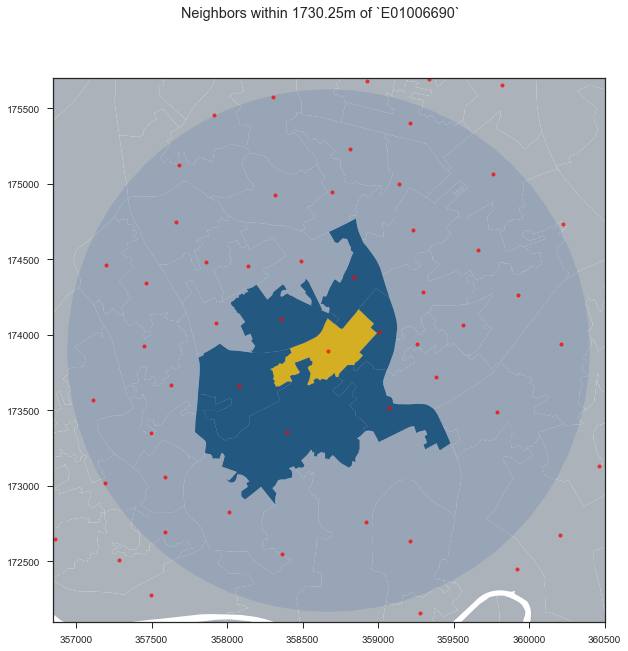

In [393]:
f, ax1 = plt.subplots(1, figsize=(10, 10))

spatial_data.plot(ax=ax1, facecolor='#abb2b9', linewidth=0.1)
focus = spatial_data.loc[['E01014539'], ['geometry']]
focus.plot(facecolor='#f6be00', alpha=1, linewidth=0, ax=ax1)
neis = spatial_data.loc[w_queen['E01014539'], :]
neis.plot(ax=ax1, facecolor='#1a5276', linewidth=0)

# Plot 1km buffer
buf = focus.centroid.buffer(min_thr)
buf.plot(alpha=0.2, ax=ax1)

# Plot centroids of neighbour
pts = np.array([(pt.x, pt.y) for pt in spatial_data.centroid])
ax1.plot(pts[:, 0], pts[:, 1], color='red', 
         linewidth=0, alpha=0.75, marker='o', markersize=4)

f.suptitle("Neighbors within " + str(round(min_thr, 2)) + "m of `E01006690`")
ax1.set_ylim(172100, 175700)
ax1.set_xlim(356850, 360500)

In [396]:
def mydistance(pt1, pt2):
    return sqrt((float(pt1.x) - float(pt2.x))*(float(pt1.x) - float(pt2.x)) + (float(pt1.y) - float(pt2.y))*(float(pt1.y) - float(pt2.y)))

In [397]:
distance_list = []

for lsoa in spatial_data.index.to_list():
    dist = mydistance(focus.centroid, spatial_data.loc[[lsoa], ['geometry']].centroid)
    if dist <= min_thr:
        distance_list.append(spatial_data.loc[[lsoa], ['geometry']].centroid)

(356500, 361000)

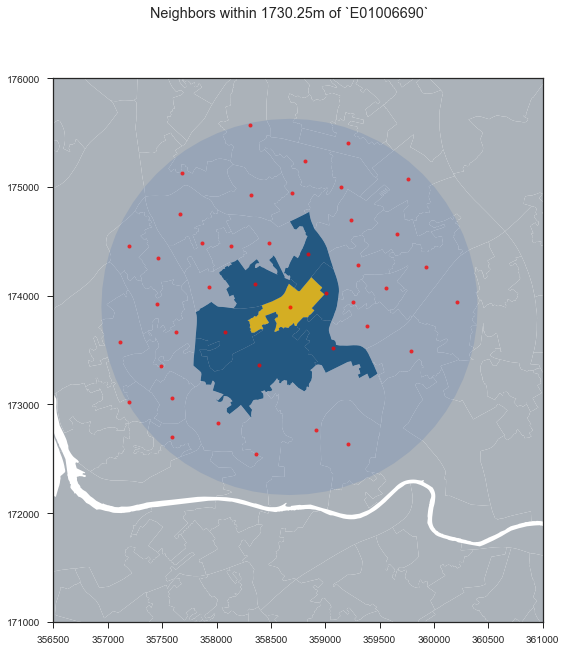

In [414]:
f, ax1 = plt.subplots(1, figsize=(10, 10))

spatial_data.plot(ax=ax1, facecolor='#abb2b9', linewidth=0.1)
focus = spatial_data.loc[['E01014539'], ['geometry']]
focus.plot(facecolor='#f6be00', alpha=1, linewidth=0, ax=ax1)
neis = spatial_data.loc[w_queen['E01014539'], :]
neis.plot(ax=ax1, facecolor='#1a5276', linewidth=0)

# Plot 1km buffer
buf.plot(alpha=0.2, ax=ax1)

# Plot centroids of neighbour
pts = np.array([(pt.x, pt.y) for pt in distance_list])
ax1.plot(pts[:, 0], pts[:, 1], color='red', 
         linewidth=0, alpha=0.75, marker='o', markersize=4)

f.suptitle("Neighbors within " + str(round(min_thr, 2)) + "m of `E01006690`")
ax1.set_ylim(171000, 176000)
ax1.set_xlim(356500, 361000)

## Standardising with matrices

In [469]:
w_queen.transform # O stands for original

'O'

In [470]:
w_queen['E01014539']

{'E01014563': 1.0,
 'E01014557': 1.0,
 'E01014542': 1.0,
 'E01033367': 1.0,
 'E01033342': 1.0,
 'E01014538': 1.0}

In [473]:
'''
    O: original, returning the object to the initial state.
    B: binary, with every neighbor having assigned a weight of one.
    R: row, with all the neighbors of a given observation adding up to one.
    V: variance stabilizing, with the sum of all the weights being constrained to the number of observations.
'''

w_queen.transform = 'R'
w_queen['E01014539']

{'E01014563': 0.16666666666666666,
 'E01014557': 0.16666666666666666,
 'E01014542': 0.16666666666666666,
 'E01033367': 0.16666666666666666,
 'E01033342': 0.16666666666666666,
 'E01014538': 0.16666666666666666}

## Reading and Writing Spatial Weights

In [474]:
# .gal file for contiguity weights

# save matrix to file, so that it doens't need to be re-run each time
fo = ps.open('w_queen.gal', 'w')
fo.write(w_queen)
fo.close()

# read matrix file
w_queen2 = ps.open('w_queen.gal', 'r').read()
w_queen2

In [485]:
# .gwt files for distance-based weights.

# Open file
fo = ps.open('w_dist1km.gwt', 'w')
fo.write(w_dist1kmC)

fo.close()

# read matrix file
w_dist1km2 = ps.open('w_dist1km.gwt', 'r').read()
# if warning, then have to remap
#w_dist1km2.remap_ids(spatial_data.index) # not working?

C:\Users\gylk\AppData\Local\Continuum\anaconda3\lib\site-packages\pysal\core\IOHandlers\gwt.py:148: RuntimeWarning: DBF relating to GWT was not found, proceeding with unordered string ids.
  warn("DBF relating to GWT was not found, proceeding with unordered string ids.", RuntimeWarning)


# Spatial Lag

The spatial lag of a given variable is the product of a spatial weight matrix and the variable itself

In [492]:
# Row-standardize the queen matrix
w_queen.transform = 'R'
# Compute spatial lag of `imd_score`
w_queen_score = ps.lag_spatial(w_queen, spatial_data['a_ln'])
# Add as column
spatial_data['w_queen_imd'] = w_queen_score

# Moran's I Plot

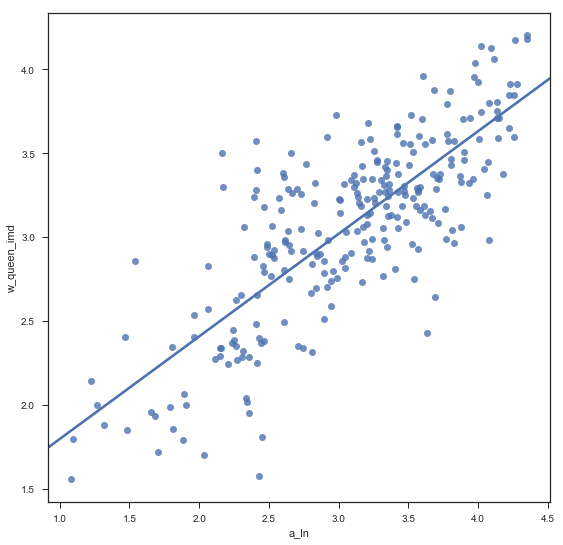

In [491]:
# Setup the figure and axis
f, ax = plt.subplots(1, figsize=(9, 9))
# Plot values
sns.regplot(x="a_ln", y="w_queen_imd", data=spatial_data, ci=None)
# Display
plt.show()

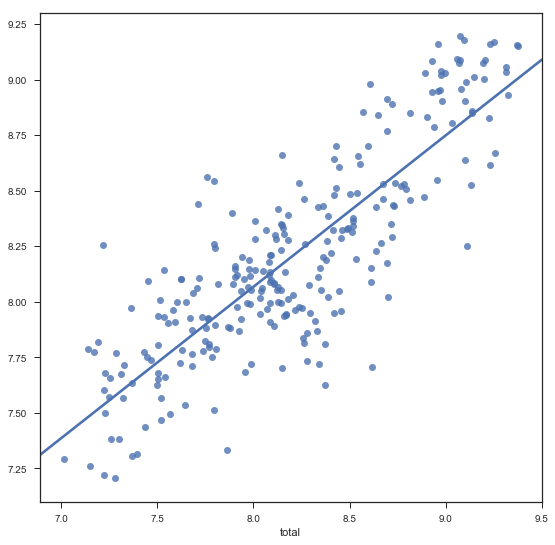

In [493]:
f, ax = plt.subplots(1, figsize=(9, 9))

sns.regplot(x=spatial_data["total"], y=ps.lag_spatial(w_queen, spatial_data['total']), ci=None)
plt.show()

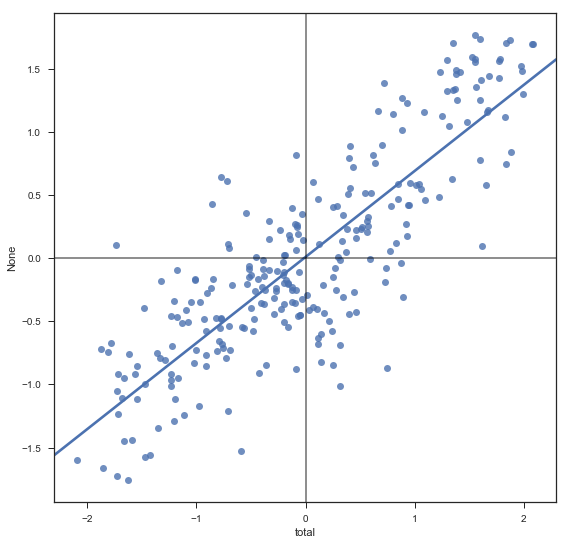

In [496]:
# Standardize total emissions
std_co2 = (spatial_data['total'] - spatial_data['total'].mean()) / spatial_data['total'].std()
# Compute the spatial lag of the standardized version and save is as a 
# Series indexed as the original variable
std_w_co2 = pd.Series(ps.lag_spatial(w_queen, std_co2), index=std_co2.index)

# Setup the figure and axis
f, ax = plt.subplots(1, figsize=(9, 9))
# Plot values
sns.regplot(x=std_co2, y=std_w_co2, ci=None)
# Add vertical and horizontal lines
plt.axvline(0, c='k', alpha=0.5)
plt.axhline(0, c='k', alpha=0.5)
# Display
plt.show()